# Project 1 - Classification of Fifa 22 Football Players

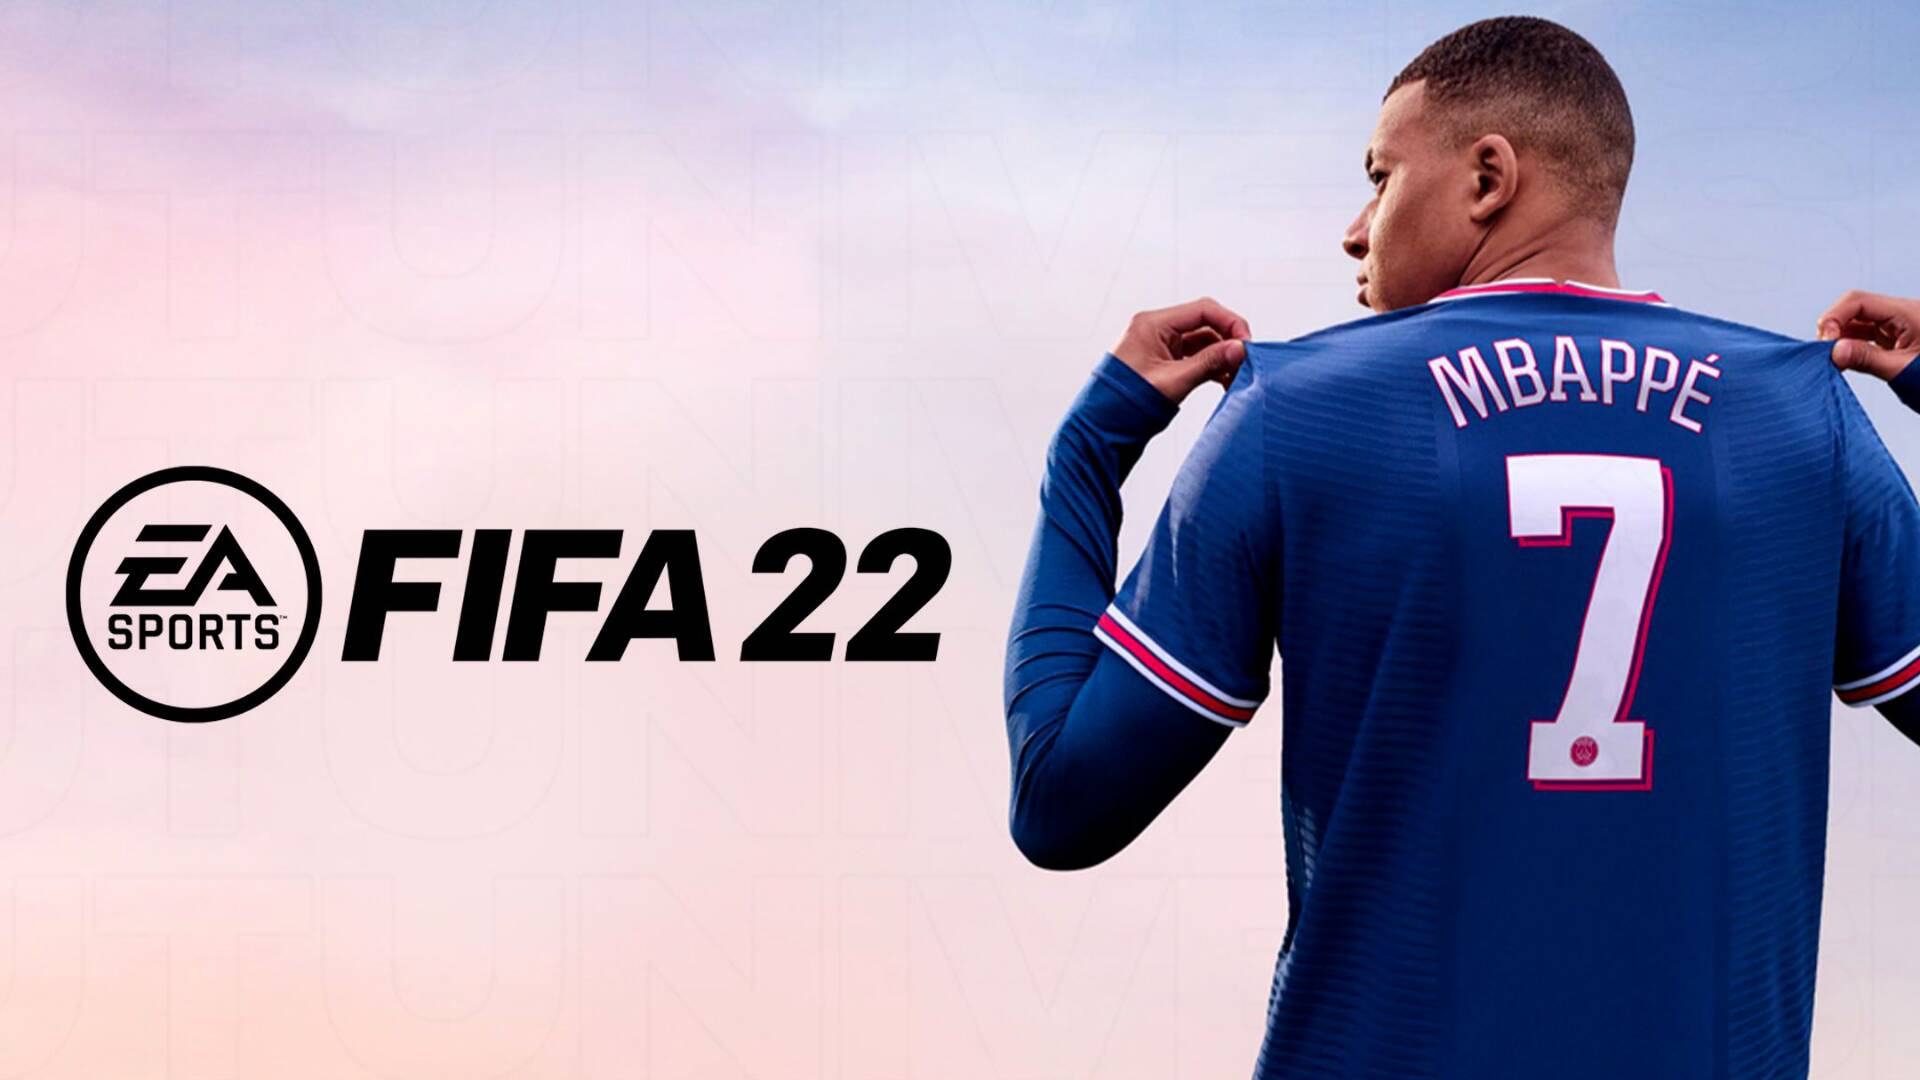

## I. Dataset

### 1. Description

For the Classification task of the project, we have chosen the "FIFA 22 Complete Player" dataset. This dataset contains attributes ratings (height, weight, speed, accelaration, jumping, etc.) of all professional football players in Fifa 22. The target variable that we use is Player Role with 4 categories (Defender, Midfileder, Attacker, Goalkeeper).

A quick overview of column definitions:

Overview:
- id - Unique ID for each player
- Name - Name of Player
- FullName - Fullname of Player
- ...

Physical Attributes:

- Height: Player's height.
- Weight: Player's weight.
- Overall: Player's overall rating - how good the player is compared to the rest. (scaled 0-100)
- PreferredFoot: Player is left or right footed? (left / right)
- WeakFoot: Rating of how good the player can use their non-preferred foot. (scaled 1 - 5)
- Acceleration
- SprintSpeed
- Agility 
- Reactions
- Balance
- ShotPower
- Jumping 
- Stamina
- Strength
- Aggression

Technical Attributes:
- SkillMoves: Rating of how good the player is at performing skill moves. (scaled 1 - 5)
- AttackingWorkRate: How active/involved is the player during attacking plays.
- DefensiveWorkRate: How active/involved is the player during defensive scenarios.
- Crossing: How well can the player cross the ball.
- Finishing: How well can the player finish.
- HeadingAccuracy: How well can the player head the ball.
- ShortPassing: How well can the player perform short passes.
- Volleys: How well can the player perform volley shot (first shot in air).
- Dribbling: How well can the player dribble (control the ball while moving).
- Curve: How well can the player curve the ball.
- FKAccuracy: How well can the player score from free kick.
- LongPassing:  How well can the player perform long passes.
- BallControl: How well can the player contol the ball (control the ball while stationary).
- LongShots: How well can the player perform long shots.
- Interceptions: How well can the player perform interception (take ball from oppnent).
- Positioning: How well can the player position him/herself on the court during play.
- Vision: How well can the player spot potential plays and other students.
- Penalties: How well can the player spot potential plays and other players.
- Composure: How well can the player stay calm in stressful situations.
- Marking: How well can the player follow closely to an opponent during defensive plays.
- StandingTackle: How well can the player tackle while standing.
- SlidingTackle:  How well can the player tackle sith sliding.
- GKDiving: GK stands for goalkeeper (all players are able to goal keep) - how well can the player perform diving saves.
- GKHandling: How well can the player handle the ball with hands.
- GKKicking: How well can the player kick the ball.
- GKPositioning: How well can the player position in the goal post.
- GKReflexes: How quick can the player react.



### Shapes: 
Our dataset contains 19260  rows and 90 columns. Three of those columns are categorical ( ). The rest are continuous.
The dataset is large but worry not, we will reduce it to only 5000 observations and focus only on Physical and Technical attributes.

In [3]:
import pandas as pd
import numpy as np
import pylab as plt
pd.options.display.max_rows = 100

df1 = pd.read_csv(r"C:\Users\laksh\LXR190004\applied machine learning\Project 1\teams_fifa22.csv")
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 734 entries, 0 to 733
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  734 non-null    int64  
 1   Name                734 non-null    object 
 2   League              734 non-null    object 
 3   LeagueId            734 non-null    int64  
 4   Overall             734 non-null    int64  
 5   Attack              734 non-null    int64  
 6   Midfield            734 non-null    int64  
 7   Defence             734 non-null    int64  
 8   TransferBudget      734 non-null    int64  
 9   DomesticPrestige    734 non-null    int64  
 10  IntPrestige         734 non-null    int64  
 11  Players             734 non-null    int64  
 12  StartingAverageAge  734 non-null    float64
 13  AllTeamAverageAge   734 non-null    float64
dtypes: float64(2), int64(10), object(2)
memory usage: 80.4+ KB


### Missing Values:
We see that there are 5 columns with large number of missing values. We consider these variables insignificant for the classification and choose to drop them. Percentage of missing values in dataset: 2.1480 %

In order to satisfy the 5% missing values condition, we will randomly assign NA to the dataframe for up to 5% of cells.



In [105]:
# Number of Missing Values
print(df1.isnull().sum())

ID                       0
Name                     0
FullName                 0
Age                      0
Height                   0
Weight                   0
PhotoUrl                 0
Nationality              0
Overall                  0
Potential                0
Growth                   0
TotalStats               0
BaseStats                0
Positions                0
BestPosition             0
Club                     0
ValueEUR                 0
WageEUR                  0
ReleaseClause            0
ClubPosition            76
ContractUntil           76
ClubNumber              76
ClubJoined               0
OnLoad                   0
NationalTeam             0
NationalPosition     18503
NationalNumber       18503
PreferredFoot            0
IntReputation            0
WeakFoot                 0
SkillMoves               0
AttackingWorkRate        0
DefensiveWorkRate        0
PaceTotal                0
ShootingTotal            0
PassingTotal             0
DribblingTotal           0
D

In [106]:
print("Percentage of missing values in dataset: {:.4f}".format(df1.isna().values.sum()/((len(df1)*len(df1.columns)))*100), "%")

Percentage of missing values in dataset: 2.1480 %


In [107]:
# Add Missing Values for another 3%
for col in df1.columns:
    df1.loc[df1.sample(frac=0.03).index, col] = np.nan

In [108]:
print("Percentage of missing values in dataset after randomly assign NA: {:.4f}".format(df1.isna().values.sum()/((len(df1)*len(df1.columns)))*100), "%")

Percentage of missing values in dataset after randomly assign NA: 5.0851 %


## II. Data Exploratory & Manipulaltion

We see that there are too many values for the target variable. Notice many positions are varaiants of either of the 4 main role in football that are Defender, Midfielder, Attackers, and Goalkeeper. Thus, we can reduce the complecity here by grouping these positions by Defender, Midfielder, Attackers, and Goalkeeper.

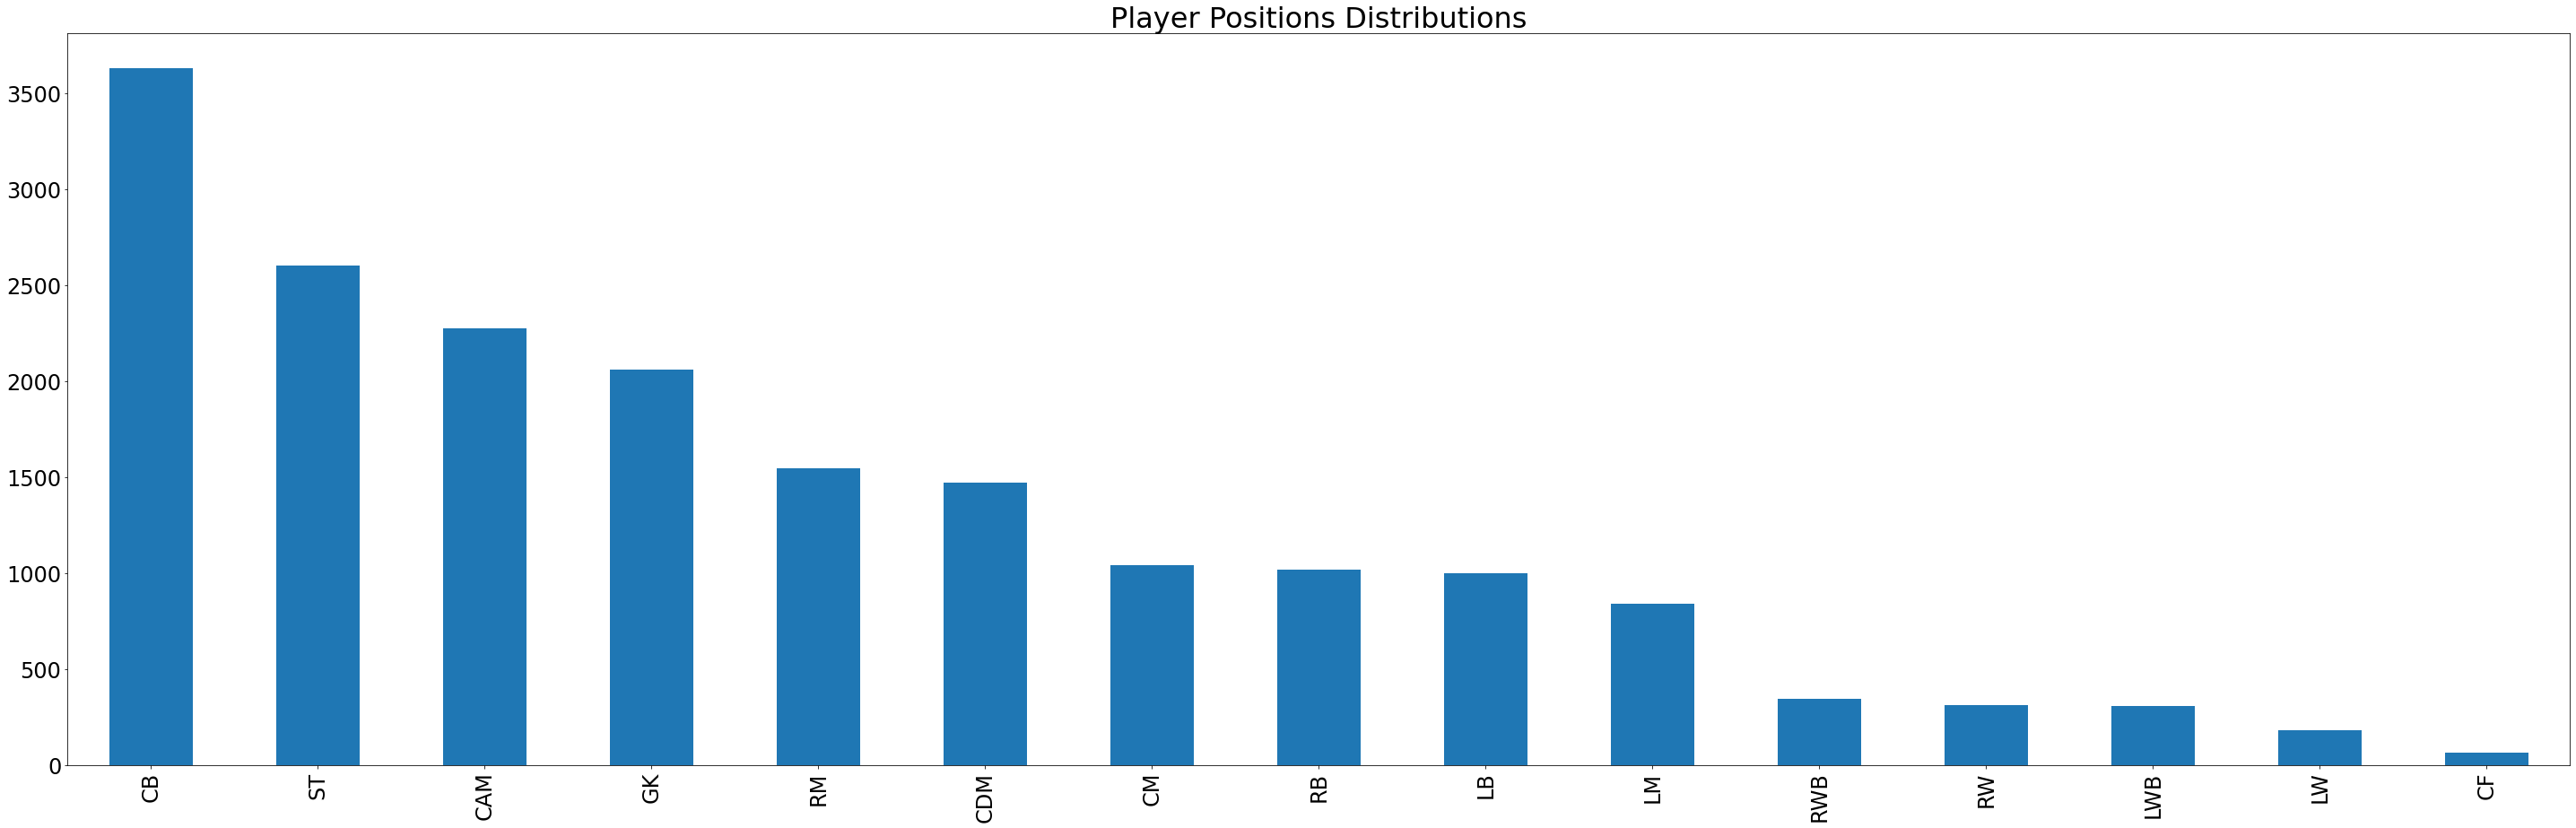

In [109]:
# Visualize our target variables
df1['BestPosition'].value_counts().plot(kind = 'bar',
                                          figsize=(50, 15),
                                          title = 'Player Positions Distributions');

In [110]:
# Group Positions into 4 categories Defender, Midfielder, Attackers, and Goalkeeper. 

attack_pos = ['ST', 'RW', 'LW', 'CF']
midfield_pos = ['CAM', 'LM', 'LM', 'CM', 'RM', 'CDM']
defend_pos = ['LWB', 'LB', 'CB', 'RB', 'RWB']
all_pos = df1['BestPosition']

df1.loc[(df1['BestPosition'].isin(attack_pos)), 'group_pos'] = 'attacker'  
df1.loc[(df1['BestPosition'].isin(midfield_pos)), 'group_pos'] = 'midfielder'  
df1.loc[(df1['BestPosition'].isin(defend_pos)), 'group_pos'] = 'defender'  
df1.loc[(df1['BestPosition'] == 'GK'), 'group_pos'] = 'goalkeeper'  
       

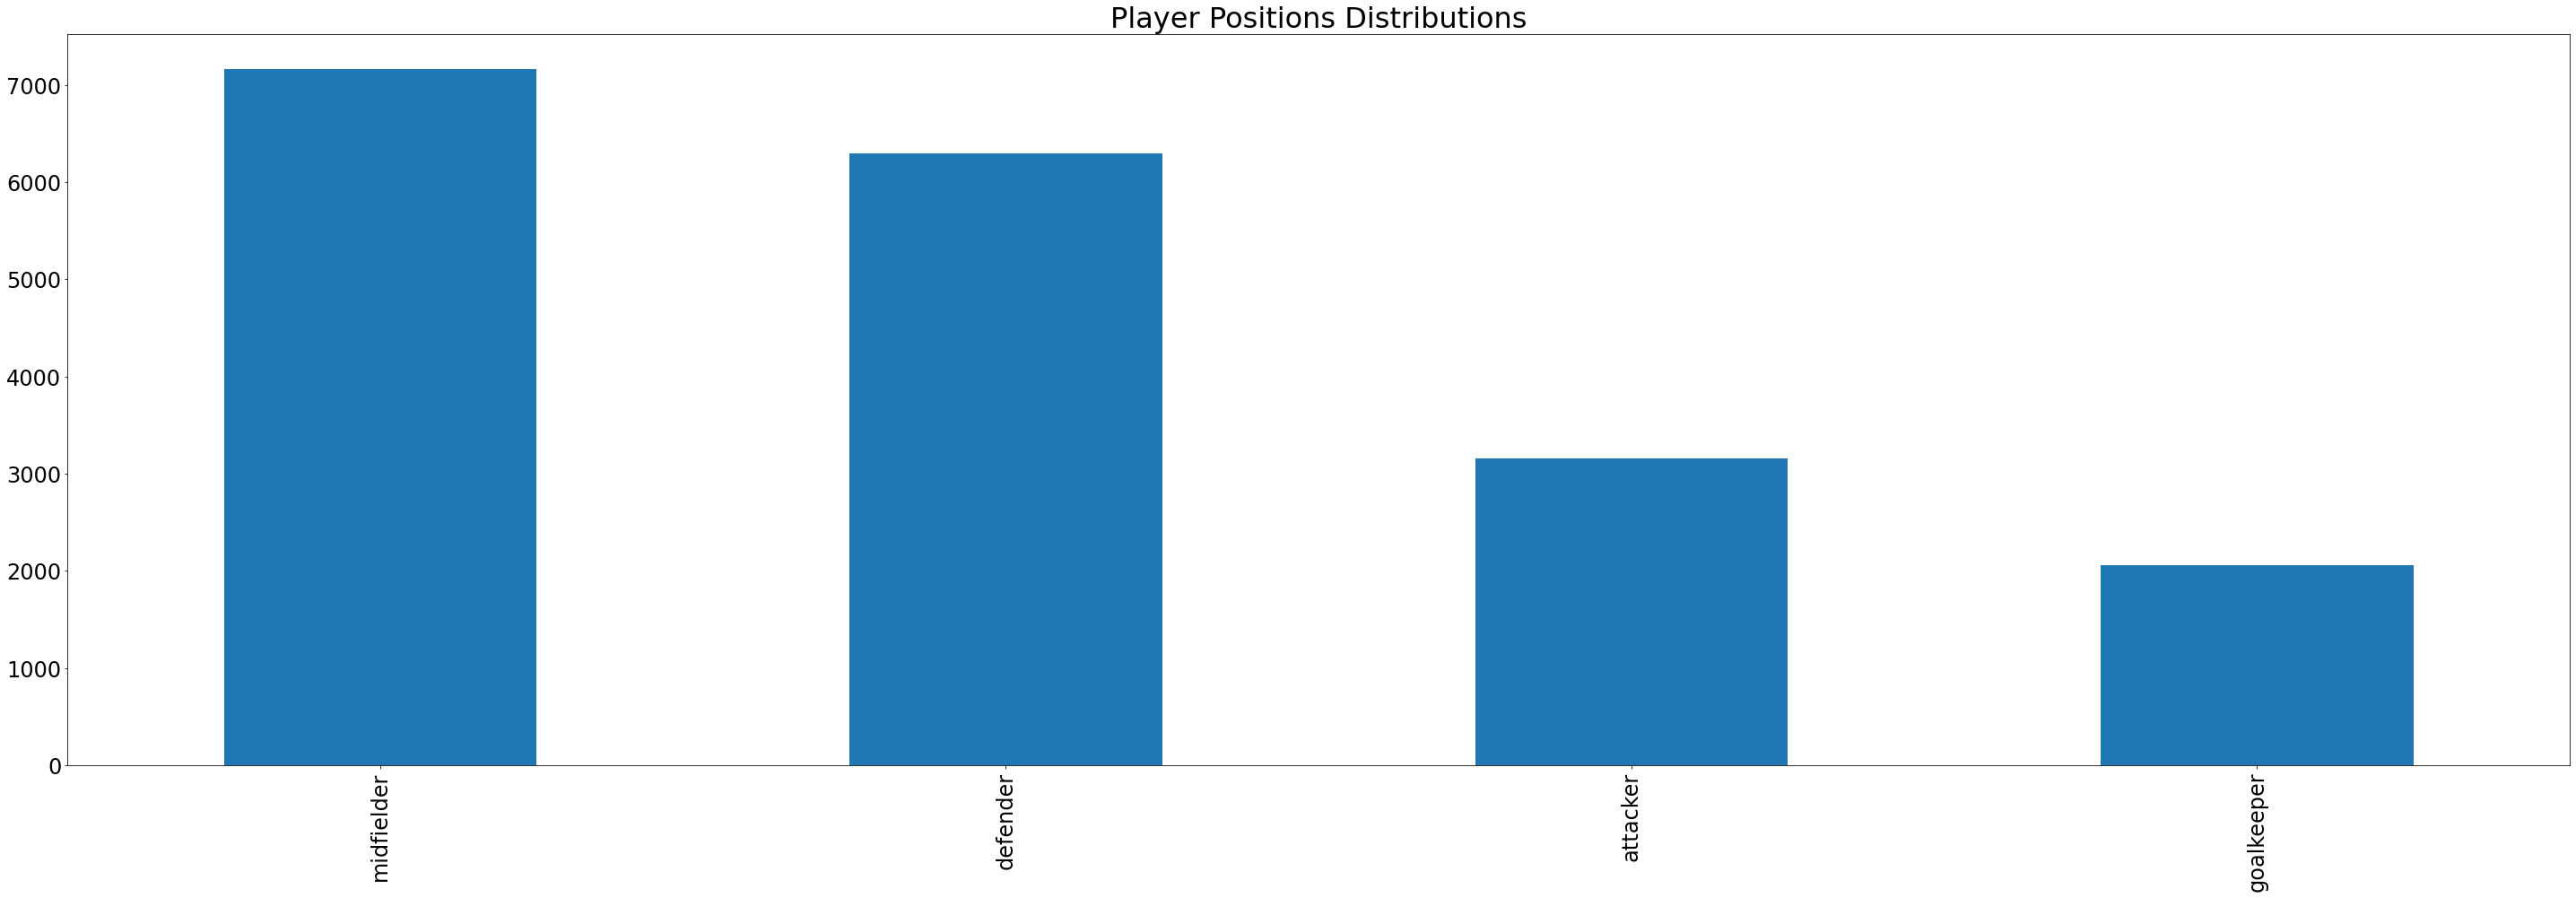

In [111]:
# Distribution of Positions after grouping into 4 categories Defender, Midfielder, Attackers, and Goalkeeper. 

df1['group_pos'].value_counts().plot(kind = 'bar',
                                          figsize=(50, 15),
                                          title = 'Player Positions Distributions');

We will only keep Physical (Heigh, Weight, Speed etc.) and Technical (Passing, Longshot, Finsishing, etc.) attributes for each player and drop the rest. This is to help us achieve the goal of classifying players' position based purely on their Physical and Technical attributes.

In [112]:
# Identify the Physical and Technical attributes. We will only work on these from now on

attributes = ['group_pos', 'Height', 'Weight', 'Overall', 'PreferredFoot', 'WeakFoot', 'SkillMoves', 
              'AttackingWorkRate', 'DefensiveWorkRate', 'Crossing', 'Finishing', 'HeadingAccuracy', 
              'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
              'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots',
              'Aggression', 'Interceptions', 'Positioning', 'Vision','Penalties','Composure', 'Marking',
              'StandingTackle','SlidingTackle', 'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes'] 

relevant_data = df1[attributes]
relevant_data

,group_pos,Height,Weight,Overall,PreferredFoot,WeakFoot,SkillMoves,AttackingWorkRate,DefensiveWorkRate,Crossing,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,attacker,170.0,72.0,93.0,Left,4.0,4.0,Medium,Low,85.0,...,75.0,96.0,20.0,35.0,24.0,6.0,11.0,15.0,14.0,8.0
1,attacker,185.0,81.0,92.0,Right,4.0,4.0,High,Medium,71.0,...,90.0,88.0,35.0,42.0,19.0,15.0,6.0,12.0,8.0,10.0
2,attacker,187.0,83.0,91.0,NaN,4.0,5.0,High,Low,87.0,...,88.0,95.0,24.0,32.0,24.0,7.0,11.0,15.0,14.0,NaN
3,attacker,182.0,73.0,91.0,Right,4.0,5.0,High,Low,78.0,...,79.0,88.0,26.0,34.0,32.0,13.0,5.0,7.0,11.0,6.0
4,goalkeeper,188.0,87.0,91.0,Right,3.0,1.0,Medium,Medium,13.0,...,11.0,68.0,27.0,12.0,18.0,87.0,92.0,78.0,90.0,90.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19255,defender,180.0,75.0,48.0,Right,3.0,NaN,Medium,Medium,28.0,...,37.0,44.0,50.0,49.0,47.0,5.0,6.0,NaN,13.0,NaN
19256,goalkeeper,196.0,85.0,48.0,Right,2.0,1.0,Medium,Medium,12.0,...,8.0,13.0,20.0,16.0,18.0,49.0,47.0,45.0,44.0,46.0
19257,defender,183.0,77.0,48.0,Right,3.0,2.0,Medium,Medium,26.0,...,37.0,45.0,52.0,53.0,51.0,14.0,NaN,10.0,7.0,7.0
19258,defender,174.0,69.0,48.0,Right,3.0,2.0,Medium,Medium,26.0,...,38.0,42.0,52.0,51.0,52.0,10.0,13.0,7.0,7.0,15.0


In [113]:
# Look at only the top 5000 players (Overall) on the extracted data above
number_player = 5000
data = relevant_data.nlargest(number_player, 'Overall')
data = data.reset_index(drop=True)
data

,group_pos,Height,Weight,Overall,PreferredFoot,WeakFoot,SkillMoves,AttackingWorkRate,DefensiveWorkRate,Crossing,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,attacker,170.0,72.0,93.0,Left,4.0,4.0,Medium,Low,85.0,...,75.0,96.0,20.0,35.0,24.0,6.0,11.0,15.0,14.0,8.0
1,attacker,185.0,81.0,92.0,Right,4.0,4.0,High,Medium,71.0,...,90.0,88.0,35.0,42.0,19.0,15.0,6.0,12.0,8.0,10.0
2,attacker,187.0,83.0,91.0,NaN,4.0,5.0,High,Low,87.0,...,88.0,95.0,24.0,32.0,24.0,7.0,11.0,15.0,14.0,NaN
3,attacker,182.0,73.0,91.0,Right,4.0,5.0,High,Low,78.0,...,79.0,88.0,26.0,34.0,32.0,13.0,5.0,7.0,11.0,6.0
4,goalkeeper,188.0,87.0,91.0,Right,3.0,1.0,Medium,Medium,13.0,...,11.0,68.0,27.0,12.0,18.0,87.0,92.0,78.0,90.0,90.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,midfielder,176.0,67.0,70.0,Right,4.0,4.0,Medium,Medium,67.0,...,44.0,65.0,31.0,23.0,17.0,NaN,13.0,10.0,10.0,13.0
4996,defender,178.0,77.0,70.0,Right,3.0,3.0,High,Medium,62.0,...,35.0,66.0,64.0,64.0,63.0,8.0,8.0,11.0,11.0,13.0
4997,midfielder,166.0,64.0,70.0,Right,3.0,2.0,Medium,Medium,50.0,...,56.0,78.0,67.0,73.0,69.0,7.0,7.0,8.0,NaN,6.0
4998,midfielder,170.0,65.0,70.0,Right,NaN,3.0,Medium,Low,78.0,...,57.0,73.0,31.0,49.0,47.0,11.0,7.0,9.0,11.0,12.0


In [114]:
# Impute Missing Values based on data type

# Take Quicklook at the current data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 43 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   group_pos          4851 non-null   object 
 1   Height             4850 non-null   float64
 2   Weight             4858 non-null   float64
 3   Overall            5000 non-null   float64
 4   PreferredFoot      4854 non-null   object 
 5   WeakFoot           4833 non-null   float64
 6   SkillMoves         4847 non-null   float64
 7   AttackingWorkRate  4859 non-null   object 
 8   DefensiveWorkRate  4840 non-null   object 
 9   Crossing           4853 non-null   float64
 10  Finishing          4853 non-null   float64
 11  HeadingAccuracy    4846 non-null   float64
 12  ShortPassing       4848 non-null   float64
 13  Volleys            4844 non-null   float64
 14  Dribbling          4846 non-null   float64
 15  Curve              4830 non-null   float64
 16  FKAccuracy         4835 

We see that most columns are nuerical data (continuos). For these, we will impute missing data with mean. For the 3 categorical columns, we will impute missing values with mode and transform into dummy variables. 

#### Numerical Columns

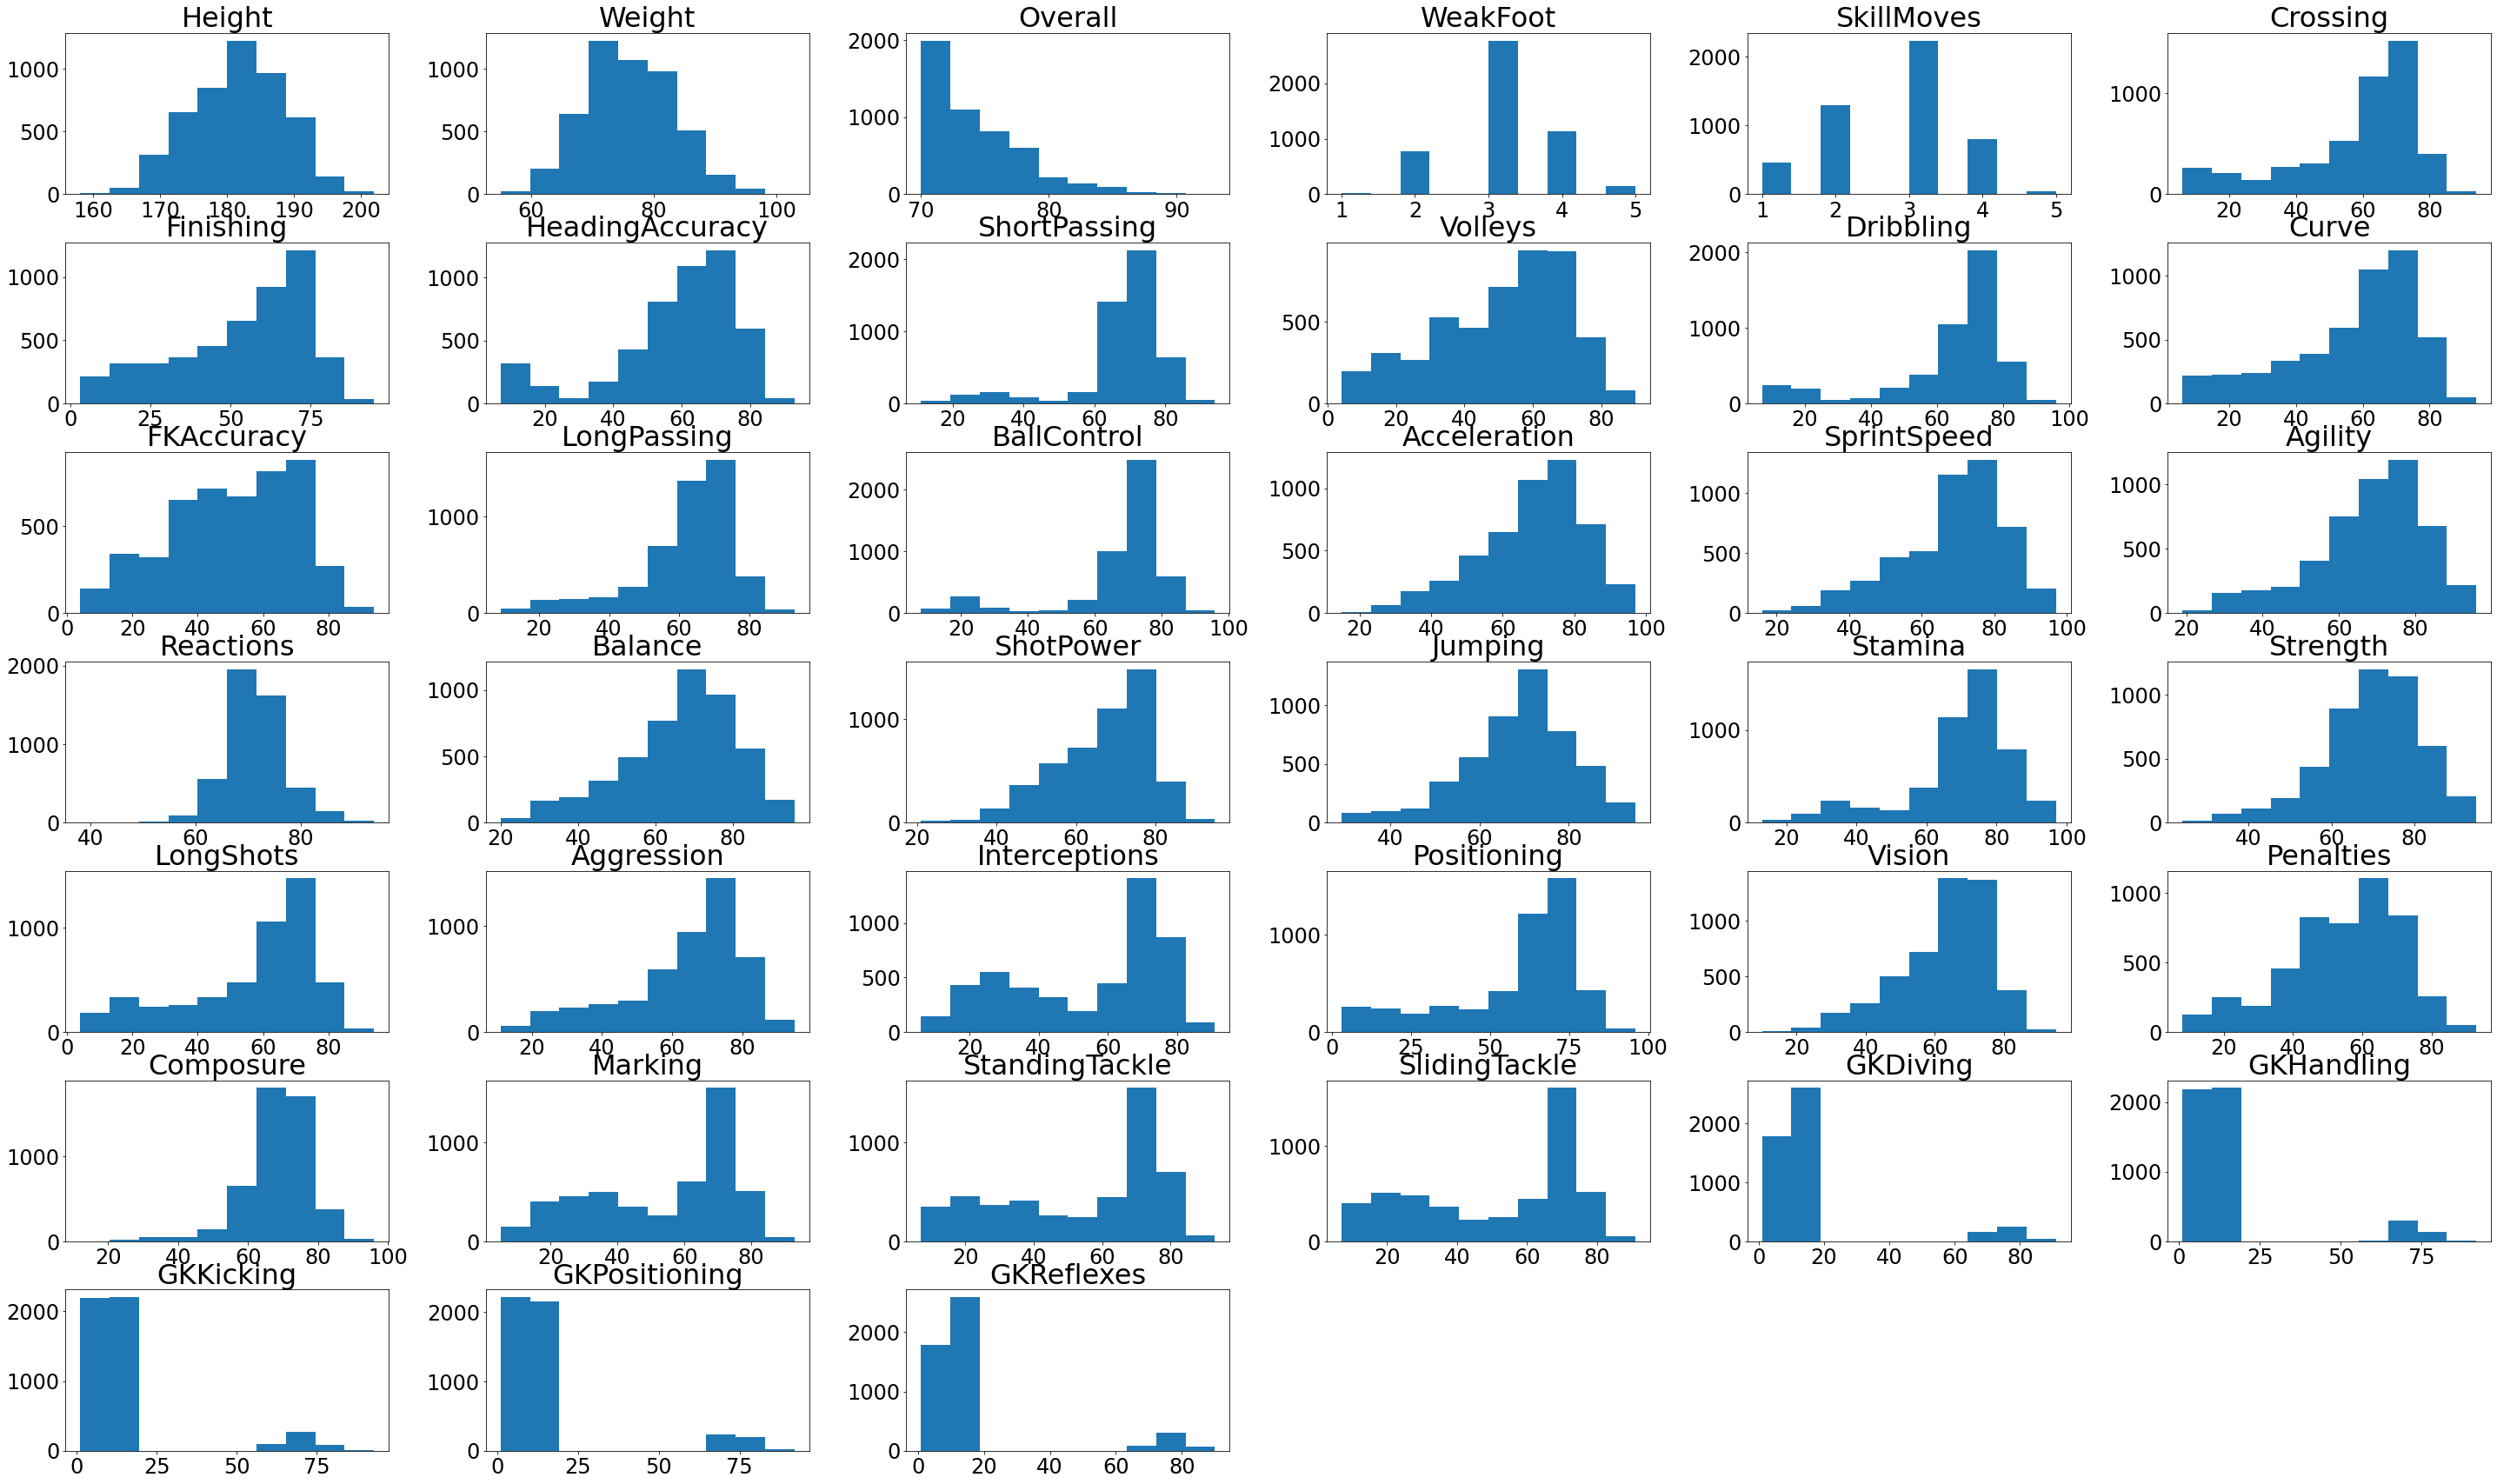

In [115]:
import matplotlib

params = {'axes.titlesize':'32',
          'xtick.labelsize':'24',
          'ytick.labelsize':'24'}
matplotlib.rcParams.update(params)
data.hist(figsize=(50, 30), grid = False, bins = 10);

Here we are checking for the distribution of each column to decide whether to use mean or median to fillna(). We see that fpr the numerical columns, we can only use mean() for Height and Weight as they have normal distribution. For the rest, we will use median().

In [116]:
# Height and Weight impute missing value with Mean()
data['Height'].fillna(data['Height'].mean(), inplace = True)
data['Weight'].fillna(data['Weight'].mean(), inplace = True)


In [117]:
# For the rest of the columns, impute missing value with Median()
cols = ['Overall', 'WeakFoot', 'SkillMoves', 
        'Crossing', 'Finishing', 'HeadingAccuracy', 
        'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
        'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots',
        'Aggression', 'Interceptions', 'Positioning', 'Vision','Penalties','Composure', 'Marking',
        'StandingTackle','SlidingTackle', 'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes']

data[cols] = data[cols].fillna(data[cols].median().iloc[0])

In [118]:
print("Percentage of missing values in dataset: {:.4f}".format(data.isna().values.sum()/((len(data)*len(data.columns)))*100), "%")
print(" ")
print("Percentage of missing values by cols: ")
print((data.isnull().sum() * 100 / len(data)))


Percentage of missing values in dataset: 0.2772 %
 
Percentage of missing values by cols: 
group_pos            2.98
Height               0.00
Weight               0.00
Overall              0.00
PreferredFoot        2.92
WeakFoot             0.00
SkillMoves           0.00
AttackingWorkRate    2.82
DefensiveWorkRate    3.20
Crossing             0.00
Finishing            0.00
HeadingAccuracy      0.00
ShortPassing         0.00
Volleys              0.00
Dribbling            0.00
Curve                0.00
FKAccuracy           0.00
LongPassing          0.00
BallControl          0.00
Acceleration         0.00
SprintSpeed          0.00
Agility              0.00
Reactions            0.00
Balance              0.00
ShotPower            0.00
Jumping              0.00
Stamina              0.00
Strength             0.00
LongShots            0.00
Aggression           0.00
Interceptions        0.00
Positioning          0.00
Vision               0.00
Penalties            0.00
Composure            0.00

#### Categorical / Binary / Ordinal Column

<AxesSubplot:title={'center':'Distribution of DefensiveWorkRate'}>

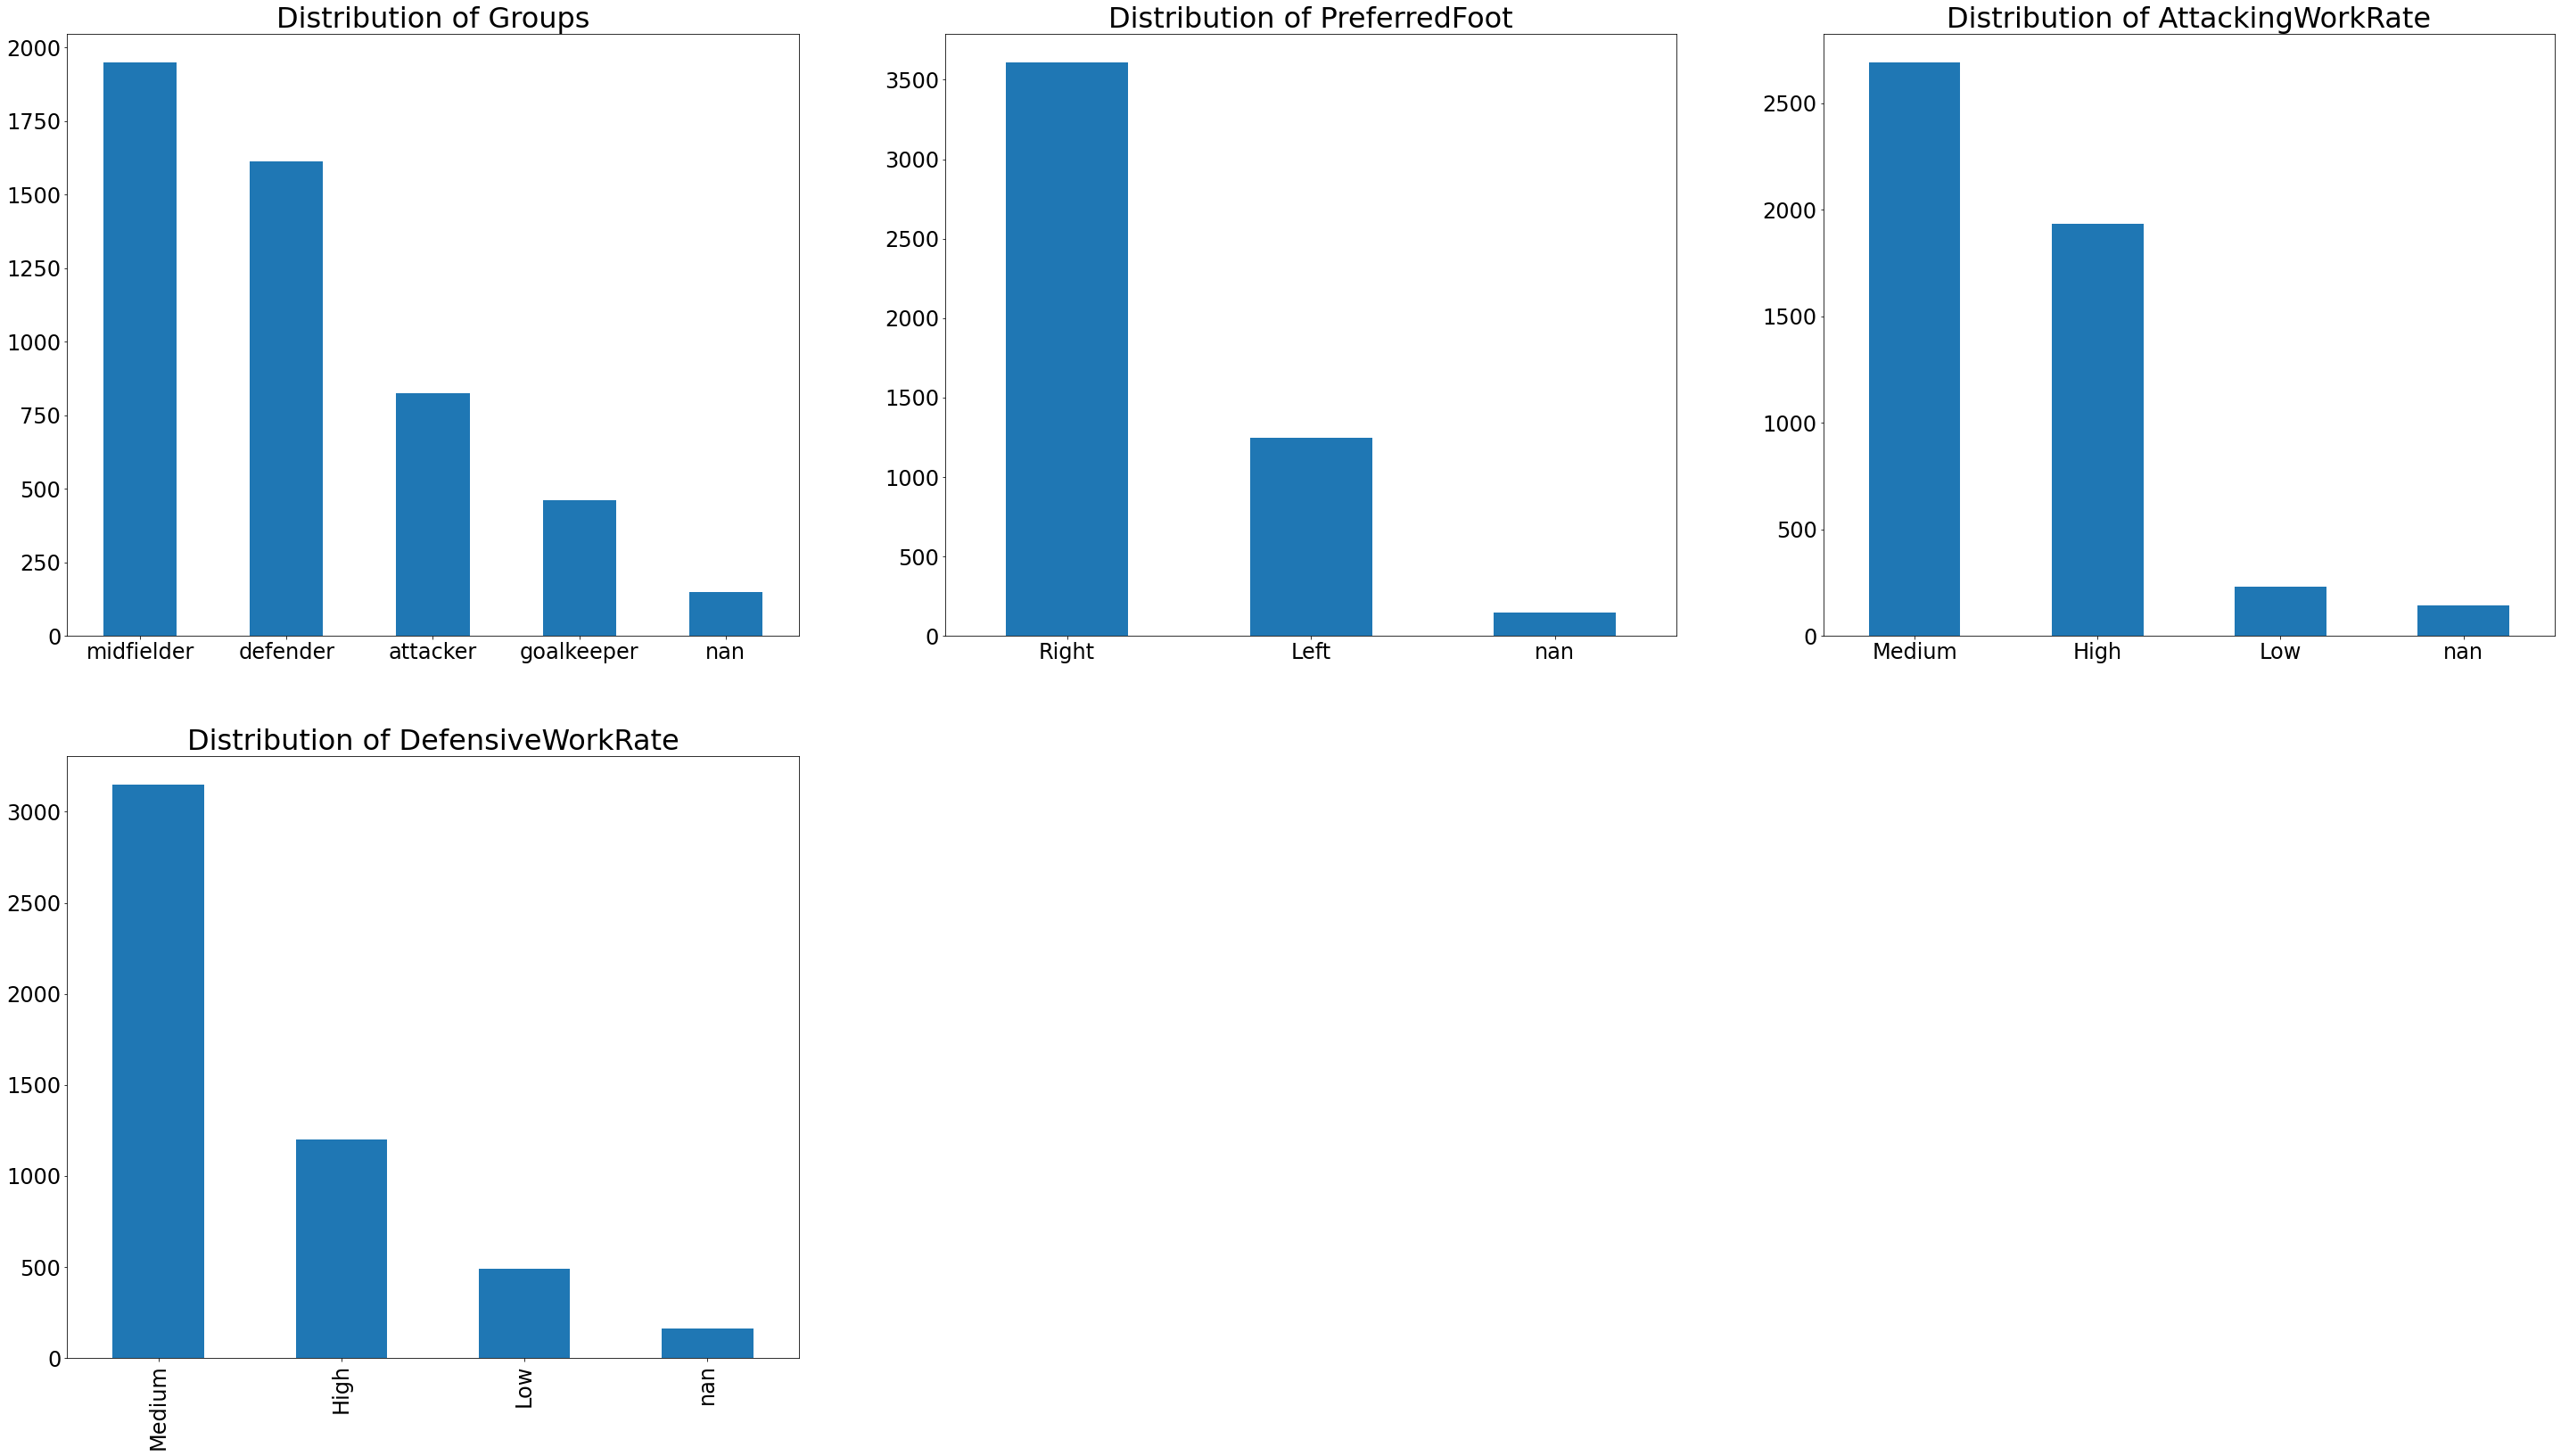

In [119]:
# Plot the distribution of the 3 categorical cols
fizsize_with_subplots = (10, 10)
fig = plt.figure(figsize = fizsize_with_subplots) 
fig_dims = (2, 3)

plt.subplot2grid(fig_dims, (0, 0))
data['group_pos'].value_counts(dropna = False).plot(kind = 'bar',
                                          figsize=(50, 15),
                                          title = 'Distribution of Groups')
plt.subplots_adjust(top = 1.5)
plt.xticks(rotation = 0)

plt.subplot2grid(fig_dims, (0, 1))
data['PreferredFoot'].value_counts(dropna = False).plot(kind = 'bar',
                                        figsize=(50, 15),
                                        title = 'Distribution of PreferredFoot')
plt.subplots_adjust(top = 1.5)
plt.xticks(rotation = 0)

plt.subplot2grid(fig_dims, (0, 2))
data['AttackingWorkRate'].value_counts(dropna = False).plot(kind = 'bar',
                                            figsize=(50, 15),
                                            title = 'Distribution of AttackingWorkRate')

plt.subplots_adjust(top = 1.5)
plt.xticks(rotation = 0)

plt.subplot2grid(fig_dims, (1, 0))
data['DefensiveWorkRate'].value_counts(dropna = False).plot(kind = 'bar',
                                            figsize=(50, 15),
                                            title = 'Distribution of DefensiveWorkRate')

- For group_pos, there are more 'Midfielder' observations than others. We will create one hot vector of 4 because there're 4 uniques values (Midfielder, Defender, Attacker, Goalkeeper).
- For PreferredFoot, there are more 'Right' observations than 'Left'. We will assign 1 to 'Right' and 0 to 'Left'.
- For AttackingWorkRate, there are more 'Medium' observations than others. We will create one hot vector of 3 because there're 3 uniques values (Medium, High, Low).
- For DefensiveWorkRate, there are more 'Medium' observations than others. We will create one hot vector of 3 because there're 3 uniques values (Medium, High, Low).

In [120]:
# Impute Missing Values & mappings / dummies for the catorical cols.

# GROUP_POS
# Impute Missing Values
data['group_pos'] = data['group_pos'].replace(np.nan, data['group_pos'].mode().iloc[0])

# Get Mappings for target
data['group_pos'] = data['group_pos'].map({'attacker' :0, 'midfielder' :1, 'defender' :2, 'goalkeeper': 3}).astype(int) #mapping numbers

In [121]:
data['group_pos'].value_counts()

1    2098
2    1614
0     826
3     462
Name: group_pos, dtype: int64

In [122]:
# PreferredFoot
# Impute Missing Values
data['PreferredFoot'] = data['PreferredFoot'].replace(np.nan, data['PreferredFoot'].mode().iloc[0])

# Get Mappings as the values are binary
data['PreferredFoot'] = data['PreferredFoot'].map({'Right':1, 'Left':0}).astype(int)

In [123]:
# AttackingWorkRate
# Impute Missing Values
data['AttackingWorkRate'] = data['AttackingWorkRate'].replace(np.nan, data['AttackingWorkRate'].mode().iloc[0])

# Get Mappings as the values are ordinal
data['AttackingWorkRate'] = data['AttackingWorkRate'].map({'Low':0, 'Medium':1, 'High':2}).astype(int)

In [124]:
# DefensiveWorkRate
# Impute Missing Values
data['DefensiveWorkRate'] = data['DefensiveWorkRate'].replace(np.nan, data['DefensiveWorkRate'].mode().iloc[0])

# Get Mappings as the values are ordinal
data['DefensiveWorkRate'] = data['DefensiveWorkRate'].map({'Low':0, 'Medium':1, 'High':2}).astype(int)

In [125]:
# Double Check outcome
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 43 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   group_pos          5000 non-null   int32  
 1   Height             5000 non-null   float64
 2   Weight             5000 non-null   float64
 3   Overall            5000 non-null   float64
 4   PreferredFoot      5000 non-null   int32  
 5   WeakFoot           5000 non-null   float64
 6   SkillMoves         5000 non-null   float64
 7   AttackingWorkRate  5000 non-null   int32  
 8   DefensiveWorkRate  5000 non-null   int32  
 9   Crossing           5000 non-null   float64
 10  Finishing          5000 non-null   float64
 11  HeadingAccuracy    5000 non-null   float64
 12  ShortPassing       5000 non-null   float64
 13  Volleys            5000 non-null   float64
 14  Dribbling          5000 non-null   float64
 15  Curve              5000 non-null   float64
 16  FKAccuracy         5000 

### Split dataset (test/train) & scaling

We split our dataset into 75% train and 25% test. We also scale our dataset since it is imbalanced using MinMaxScaler(). Our data is now ready to be used to build models.

In [126]:
import sklearn as sk
from sklearn.model_selection import train_test_split

X = data.drop('group_pos', axis = 1)
y = data['group_pos']

X_train_org, X_test_org, y_train, y_test = train_test_split(X, y, train_size = 0.75, random_state = 0)

In [127]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

X_train = pd.DataFrame(X_train, columns = X.columns) 
X_test = pd.DataFrame(X_test, columns = X.columns)

## III. Classification Models


#### Choice of Scoring Function other than Accuracy (F1 score)

Because our dataset is imbalanced, we can not build models just based on accuracy alone. The reason is if we classify everything as the majority class, then we will still get good results even though it's wrong. Therefore, we should also pay attention to precision and recall. Precision is the proportion of positive identifications that was actually correct. Recall is the proportion of actual positives that was identified correctly. These two measures help reduce Type I and II errors.

There is another measure called f1 score that take both precision and recall into account. The F1 score can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0. The formula for the F1 score is:

F1 = 2 * (precision * recall) / (precision + recall)

We will use F1 score as a scoring function for our imbalanced dataset.

### KNN Classification

In [128]:
#### KNN Classifier

from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

param_knn = {'n_neighbors': range(1,20)}

knn = KNeighborsClassifier()

knn_grid = GridSearchCV(knn, param_grid = param_knn, cv = 5, scoring = 'f1_macro', n_jobs = -1, return_train_score = True)
knn_grid.fit(X_train, y_train)

cvknn = knn_grid.best_score_
testknn = knn_grid.score(X_test, y_test)

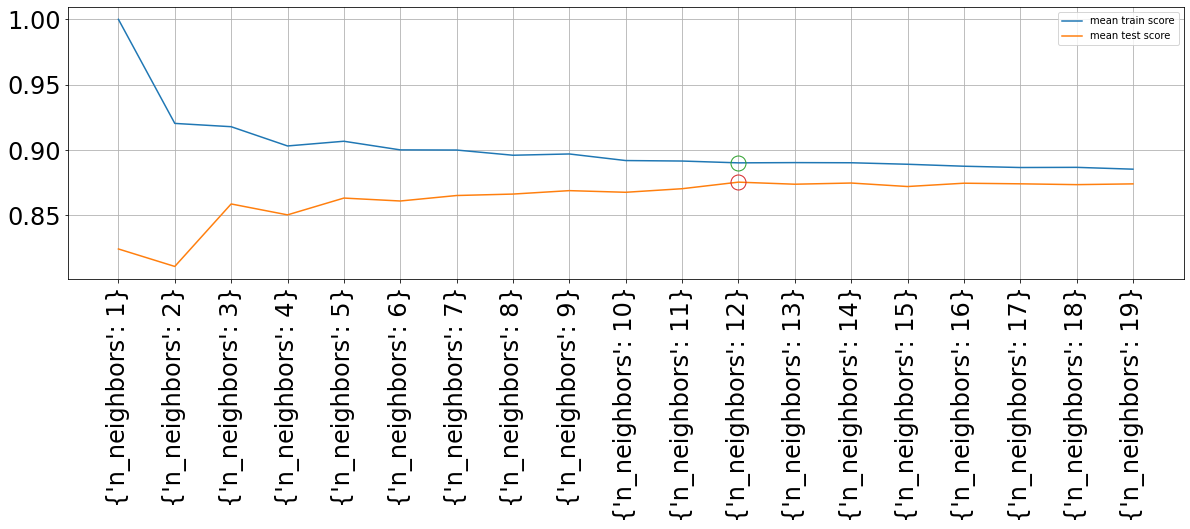

In [129]:
result = pd.DataFrame(knn_grid.cv_results_)

%matplotlib inline

plt.subplots(figsize = (20,5))
plt.plot(range(result['params'].shape[0]), result['mean_train_score'], label = 'mean train score')
plt.plot(range(result['params'].shape[0]), result['mean_test_score'], label = 'mean test score')
plt.xticks(range(result['params'].shape[0]), result['params'], rotation = 90)
plt.plot([knn_grid.best_index_], result['mean_train_score'][knn_grid.best_index_], 'o', markersize = 15, fillstyle = 'none')
plt.plot([knn_grid.best_index_], result['mean_test_score'][knn_grid.best_index_], 'o', markersize = 15, fillstyle = 'none')
plt.legend()
plt.grid()

In [130]:
print("Best parameters for KNN Classifier: {}".format(knn_grid.best_params_))
print("Best cross-validation score for KNN Classifier: {:.4f}".format(cvknn))
print("Test score for KNN Classifier: {:.4f}".format(testknn))

Best parameters for KNN Classifier: {'n_neighbors': 12}
Best cross-validation score for KNN Classifier: 0.8753
Test score for KNN Classifier: 0.8746


In [131]:
# Classification report for KNN Classifier

from sklearn.metrics import classification_report

y_pred = knn_grid.predict(X_test)

print(classification_report(y_test, y_pred, target_names= ['attacker', 'midfielder', 'defender', ' goalkeeper']))


              precision    recall  f1-score   support

    attacker       0.85      0.79      0.82       201
  midfielder       0.80      0.86      0.83       506
    defender       0.90      0.84      0.87       431
  goalkeeper       0.97      1.00      0.98       112

    accuracy                           0.85      1250
   macro avg       0.88      0.87      0.87      1250
weighted avg       0.86      0.85      0.85      1250



#### Logistics Regression

In [132]:
from sklearn.linear_model import LogisticRegression

param_logreg = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                'max_iter': [1000, 5000, 10000]}

logreg = LogisticRegression(random_state = 0)

logreg_grid = GridSearchCV(logreg, param_grid = param_logreg, cv = 5, scoring = 'f1_macro', n_jobs = -1, return_train_score = True)
logreg_grid.fit(X_train, y_train)

cvlogreg = logreg_grid.best_score_
testlogreg = logreg_grid.score(X_test, y_test)

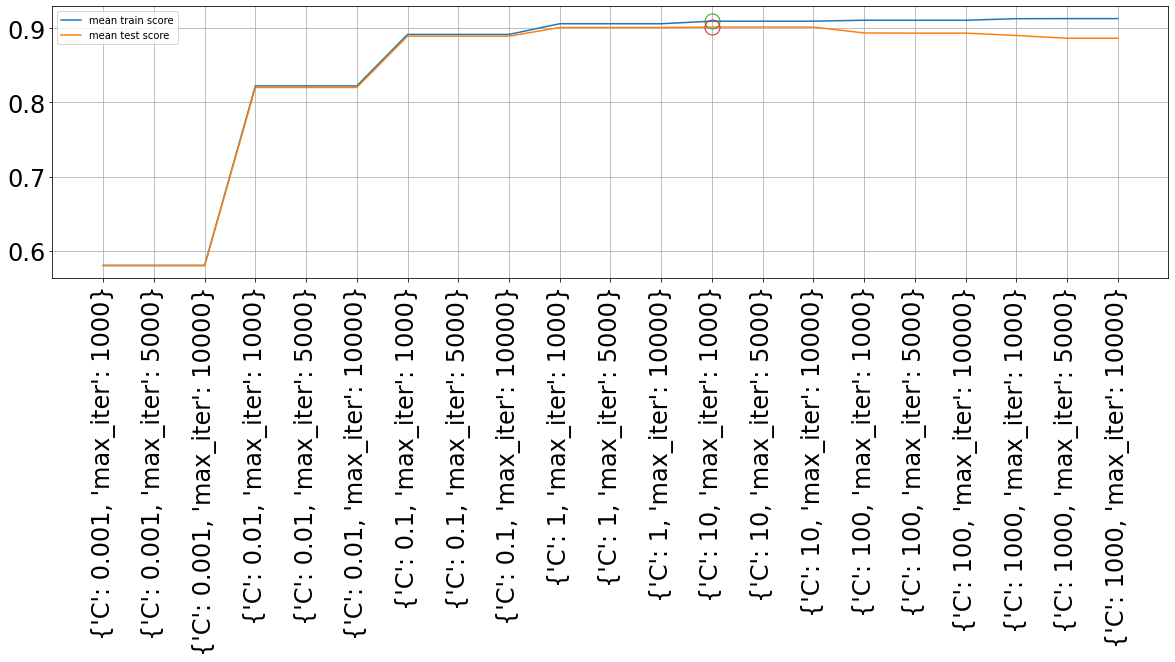

In [133]:
result = pd.DataFrame(logreg_grid.cv_results_)

%matplotlib inline

plt.subplots(figsize = (20,5))
plt.plot(range(result['params'].shape[0]), result['mean_train_score'], label = 'mean train score')
plt.plot(range(result['params'].shape[0]), result['mean_test_score'], label = 'mean test score')
plt.xticks(range(result['params'].shape[0]), result['params'], rotation = 90)
plt.plot([logreg_grid.best_index_], result['mean_train_score'][logreg_grid.best_index_], 'o', markersize = 15, fillstyle = 'none')
plt.plot([logreg_grid.best_index_], result['mean_test_score'][logreg_grid.best_index_], 'o', markersize = 15, fillstyle = 'none')
plt.legend()
plt.grid()

In [134]:
print("Best parameters for Logistic Regression: {}".format(logreg_grid.best_params_))
print("Best cross-validation score for Logistic Regression: {:.4f}".format(cvlogreg))
print("Test score for Logistic Regression: {:.4f}".format(testlogreg))

Best parameters for Logistic Regression: {'C': 10, 'max_iter': 1000}
Best cross-validation score for Logistic Regression: 0.9016
Test score for Logistic Regression: 0.9012


In [135]:
# Classification report for Logistic Regression Classifier

from sklearn.metrics import classification_report

y_pred = logreg_grid.predict(X_test)

print(classification_report(y_test, y_pred, target_names= ['attacker', 'midfielder', 'defender', ' goalkeeper']))

              precision    recall  f1-score   support

    attacker       0.87      0.82      0.84       201
  midfielder       0.86      0.88      0.87       506
    defender       0.92      0.92      0.92       431
  goalkeeper       0.96      0.97      0.97       112

    accuracy                           0.89      1250
   macro avg       0.90      0.90      0.90      1250
weighted avg       0.89      0.89      0.89      1250



#### Linear SVC

We seee that we don't need to go above 100 for parameter C

In [136]:
from sklearn.svm import LinearSVC

param_lsvc = {'C': [0.01, 0.1, 1, 10, 100, 1000],
              'max_iter': [1000, 5000, 10000]}

lsvc = LinearSVC(random_state = 0)

lsvc_grid = GridSearchCV(lsvc, param_grid = param_lsvc, cv = 5, scoring = 'f1_macro', n_jobs = -1, return_train_score = True)
lsvc_grid.fit(X_train, y_train)

cvlsvc = lsvc_grid.best_score_
testlsvc = lsvc_grid.score(X_test, y_test)

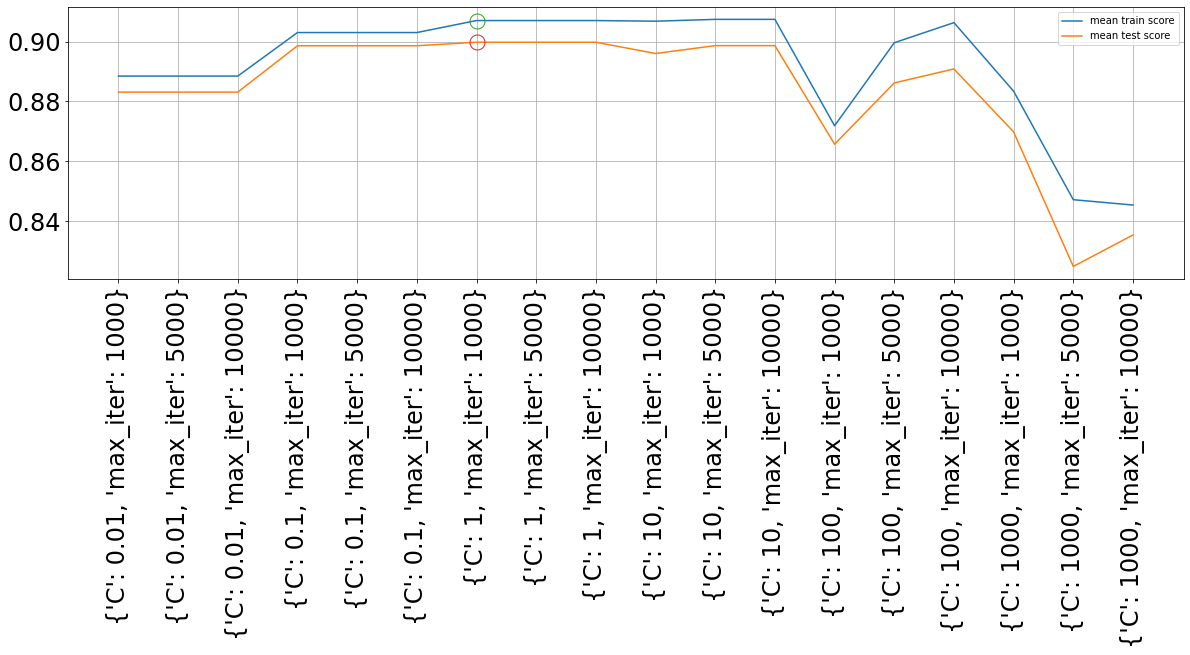

In [137]:
result = pd.DataFrame(lsvc_grid.cv_results_)

%matplotlib inline

plt.subplots(figsize = (20,5))
plt.plot(range(result['params'].shape[0]), result['mean_train_score'], label = 'mean train score')
plt.plot(range(result['params'].shape[0]), result['mean_test_score'], label = 'mean test score')
plt.xticks(range(result['params'].shape[0]), result['params'], rotation = 90)
plt.plot([lsvc_grid.best_index_], result['mean_train_score'][lsvc_grid.best_index_], 'o', markersize = 15, fillstyle = 'none')
plt.plot([lsvc_grid.best_index_], result['mean_test_score'][lsvc_grid.best_index_], 'o', markersize = 15, fillstyle = 'none')
plt.legend()
plt.grid()

In [138]:
print("Best parameters for Linear SVC: {}".format(lsvc_grid.best_params_))
print("Best cross-validation score for Linear SVC: {:.4f}".format(cvlsvc))
print("Test score for Linear SVC: {:.4f}".format(testlsvc))

Best parameters for Linear SVC: {'C': 1, 'max_iter': 1000}
Best cross-validation score for Linear SVC: 0.8998
Test score for Linear SVC: 0.8992


In [139]:
# Classification report for Linear SVC Classifier

from sklearn.metrics import classification_report

y_pred = lsvc_grid.predict(X_test)

print(classification_report(y_test, y_pred, target_names= ['attacker', 'midfielder', 'defender', ' goalkeeper']))

              precision    recall  f1-score   support

    attacker       0.87      0.80      0.83       201
  midfielder       0.85      0.88      0.86       506
    defender       0.92      0.92      0.92       431
  goalkeeper       0.97      1.00      0.98       112

    accuracy                           0.89      1250
   macro avg       0.90      0.90      0.90      1250
weighted avg       0.89      0.89      0.89      1250



#### SVC (kernel = 'rbf')

In [140]:
from sklearn.svm import SVC

param_svcrbf = {'C': [0.01, 0.1, 1, 10, 100],
                'gamma': [0.01, 0.1, 1, 10, 100]}

svcrbf = SVC(kernel = 'rbf', random_state = 0)

svcrbf_grid = GridSearchCV(svcrbf, param_grid = param_svcrbf, cv = 5, scoring = 'f1_macro', 
                           n_jobs = -1, verbose = 10, return_train_score = True)
svcrbf_grid.fit(X_train, y_train)

cvsvcrbf = svcrbf_grid.best_score_
testsvcrbf = svcrbf_grid.score(X_test, y_test)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


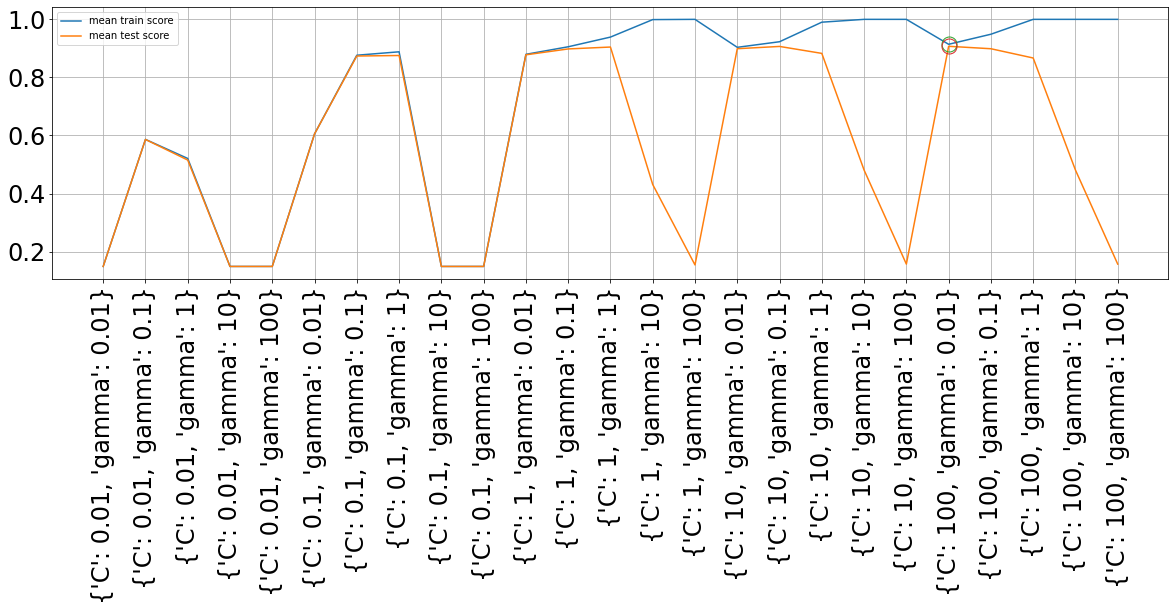

In [141]:
result = pd.DataFrame(svcrbf_grid.cv_results_)

%matplotlib inline

plt.subplots(figsize = (20,5))
plt.plot(range(result['params'].shape[0]), result['mean_train_score'], label = 'mean train score')
plt.plot(range(result['params'].shape[0]), result['mean_test_score'], label = 'mean test score')
plt.xticks(range(result['params'].shape[0]), result['params'], rotation = 90)
plt.plot([svcrbf_grid.best_index_], result['mean_train_score'][svcrbf_grid.best_index_], 'o', markersize = 15, fillstyle = 'none')
plt.plot([svcrbf_grid.best_index_], result['mean_test_score'][svcrbf_grid.best_index_], 'o', markersize = 15, fillstyle = 'none')
plt.legend()
plt.grid()

In [142]:
print("Best parameters for SVC with rbf kernel: {}".format(svcrbf_grid.best_params_))
print("Best cross-validation score for SVC with rbf kernel: {:.4f}".format(cvsvcrbf))
print("Test score for SVC with rbf kernel: {:.4f}".format(testsvcrbf))

Best parameters for SVC with rbf kernel: {'C': 100, 'gamma': 0.01}
Best cross-validation score for SVC with rbf kernel: 0.9072
Test score for SVC with rbf kernel: 0.9117


In [143]:
# Classification report for SVC (rbf) Classifier

from sklearn.metrics import classification_report

y_pred = lsvc_grid.predict(X_test)

print(classification_report(y_test, y_pred, target_names= ['attacker', 'midfielder', 'defender', ' goalkeeper']))

              precision    recall  f1-score   support

    attacker       0.87      0.80      0.83       201
  midfielder       0.85      0.88      0.86       506
    defender       0.92      0.92      0.92       431
  goalkeeper       0.97      1.00      0.98       112

    accuracy                           0.89      1250
   macro avg       0.90      0.90      0.90      1250
weighted avg       0.89      0.89      0.89      1250



#### SVC (kernel = 'poly')

In [144]:
param_svcpoly = {'C': [0.01, 0.1, 1, 10, 100],
                 'gamma': [0.01, 0.1, 1, 10, 100]}

svcpoly = SVC(kernel = 'poly', random_state = 0, max_iter = 10000)

svcpoly_grid = GridSearchCV(svcpoly, param_grid = param_svcpoly, cv = 5, scoring = 'f1_macro', 
                           n_jobs = -1, verbose = 10, return_train_score = True)
svcpoly_grid.fit(X_train, y_train)

cvsvcpoly = svcpoly_grid.best_score_
testsvcpoly = svcpoly_grid.score(X_test, y_test)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


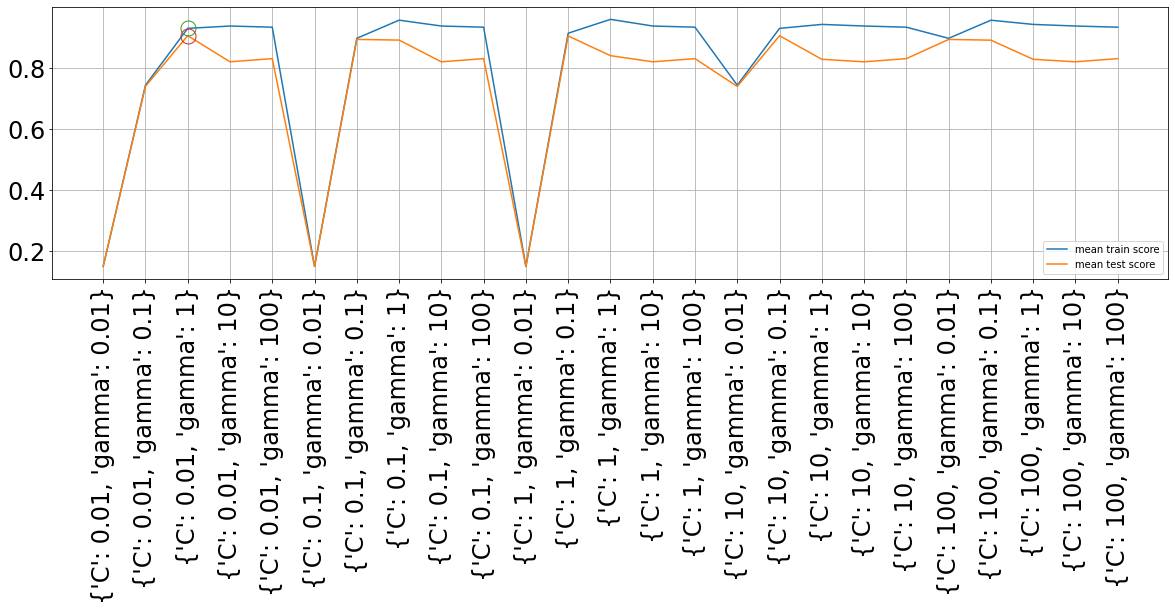

In [145]:
result = pd.DataFrame(svcpoly_grid.cv_results_)

%matplotlib inline

plt.subplots(figsize = (20,5))
plt.plot(range(result['params'].shape[0]), result['mean_train_score'], label = 'mean train score')
plt.plot(range(result['params'].shape[0]), result['mean_test_score'], label = 'mean test score')
plt.xticks(range(result['params'].shape[0]), result['params'], rotation = 90)
plt.plot([svcpoly_grid.best_index_], result['mean_train_score'][svcpoly_grid.best_index_], 'o', markersize = 15, fillstyle = 'none')
plt.plot([svcpoly_grid.best_index_], result['mean_test_score'][svcpoly_grid.best_index_], 'o', markersize = 15, fillstyle = 'none')
plt.legend()
plt.grid()

In [146]:
print("Best parameters for SVC with poly kernel: {}".format(svcpoly_grid.best_params_))
print("Best cross-validation score for SVC with poly kernel: {:.4f}".format(cvsvcpoly))
print("Test score for SVC with poly kernel: {:.4f}".format(testsvcpoly))

Best parameters for SVC with poly kernel: {'C': 0.01, 'gamma': 1}
Best cross-validation score for SVC with poly kernel: 0.9056
Test score for SVC with poly kernel: 0.9113


In [147]:
# Classification report for SVC (poly) Classifier

from sklearn.metrics import classification_report

y_pred = svcpoly_grid.predict(X_test)

print(classification_report(y_test, y_pred, target_names= ['attacker', 'midfielder', 'defender', ' goalkeeper']))

              precision    recall  f1-score   support

    attacker       0.89      0.82      0.85       201
  midfielder       0.88      0.89      0.88       506
    defender       0.92      0.94      0.93       431
  goalkeeper       0.97      1.00      0.98       112

    accuracy                           0.90      1250
   macro avg       0.91      0.91      0.91      1250
weighted avg       0.90      0.90      0.90      1250



#### SVC(kernel = 'linear)

In [148]:
param_svcl = {'C': [0.01, 0.1, 1, 10, 100],
              'gamma': [0.01, 0.1, 1, 10, 100]}

svcl = SVC(kernel = 'linear', random_state = 0)

svcl_grid = GridSearchCV(svcl, param_grid = param_svcl, cv = 5, scoring = 'f1_macro', 
                         n_jobs = -1, verbose = 10, return_train_score = True)
svcl_grid.fit(X_train, y_train)

cvsvcl = svcl_grid.best_score_
testsvcl = svcl_grid.score(X_test, y_test)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


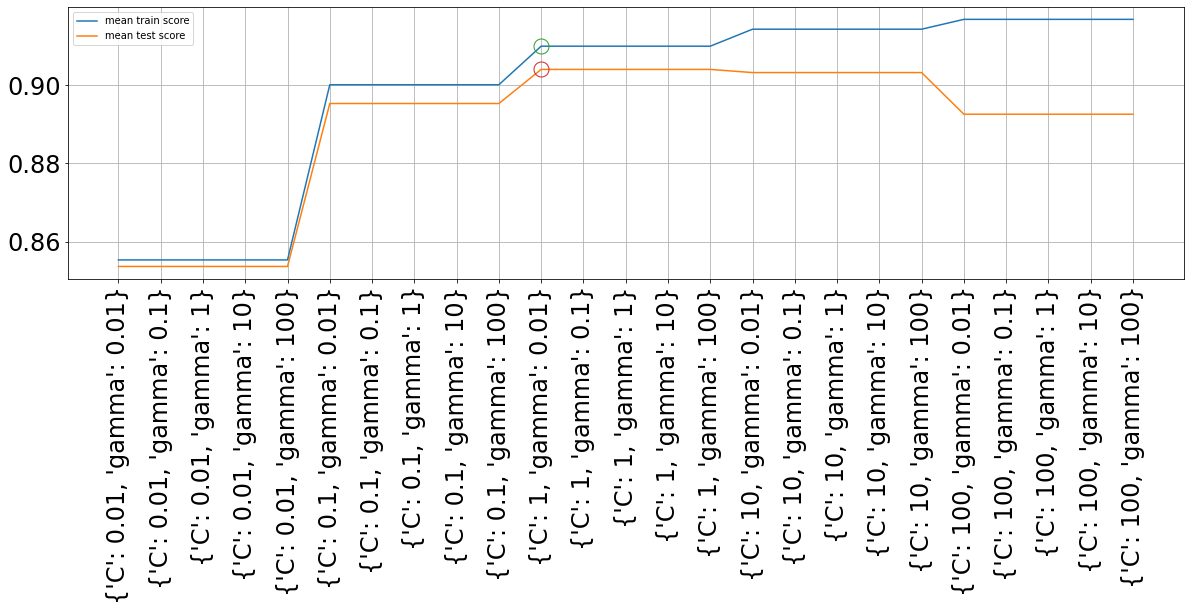

In [149]:
result = pd.DataFrame(svcl_grid.cv_results_)

%matplotlib inline

plt.subplots(figsize = (20,5))
plt.plot(range(result['params'].shape[0]), result['mean_train_score'], label = 'mean train score')
plt.plot(range(result['params'].shape[0]), result['mean_test_score'], label = 'mean test score')
plt.xticks(range(result['params'].shape[0]), result['params'], rotation = 90)
plt.plot([svcl_grid.best_index_], result['mean_train_score'][svcl_grid.best_index_], 'o', markersize = 15, fillstyle = 'none')
plt.plot([svcl_grid.best_index_], result['mean_test_score'][svcl_grid.best_index_], 'o', markersize = 15, fillstyle = 'none')
plt.legend()
plt.grid()

In [150]:
print("Best parameters for SVC with linear kernel: {}".format(svcl_grid.best_params_))
print("Best cross-validation score for SVC with linear kernel: {:.4f}".format(cvsvcl))
print("Test score for SVC with linear kernel: {:.4f}".format(testsvcl))

Best parameters for SVC with linear kernel: {'C': 1, 'gamma': 0.01}
Best cross-validation score for SVC with linear kernel: 0.9040
Test score for SVC with linear kernel: 0.9058


In [151]:
# Classification report for SVC (linear) Classifier

from sklearn.metrics import classification_report

y_pred = svcl_grid.predict(X_test)

print(classification_report(y_test, y_pred, target_names= ['attacker', 'midfielder', 'defender', ' goalkeeper']))

              precision    recall  f1-score   support

    attacker       0.88      0.82      0.85       201
  midfielder       0.86      0.88      0.87       506
    defender       0.92      0.92      0.92       431
  goalkeeper       0.97      1.00      0.98       112

    accuracy                           0.90      1250
   macro avg       0.91      0.90      0.91      1250
weighted avg       0.90      0.90      0.89      1250



#### Decision Tree Classifier

In [152]:
from sklearn.tree import DecisionTreeClassifier

param_dtc = {'max_leaf_nodes': [2, 5, 10, 15, 20, 25, 50]}

dtc = DecisionTreeClassifier(random_state = 0)

dtc_grid = GridSearchCV(dtc, param_grid = param_dtc, cv = 5, scoring = 'f1_macro', 
                        n_jobs = -1, return_train_score = True)
dtc_grid.fit(X_train, y_train)

cvdtc = dtc_grid.best_score_
testdtc = dtc_grid.score(X_test, y_test)

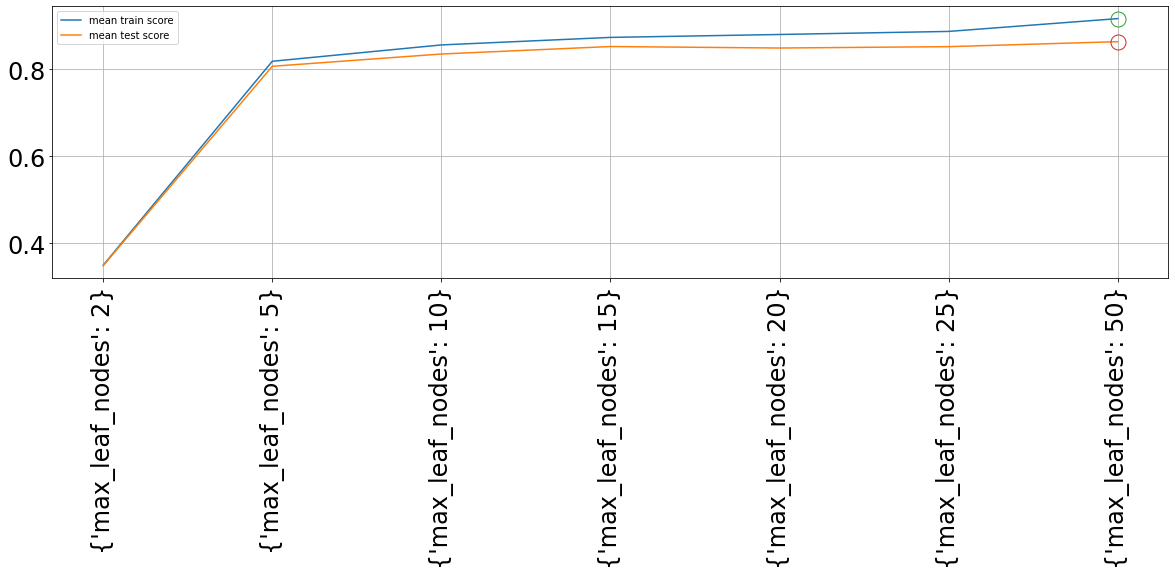

In [153]:
result = pd.DataFrame(dtc_grid.cv_results_)

%matplotlib inline

plt.subplots(figsize = (20,5))
plt.plot(range(result['params'].shape[0]), result['mean_train_score'], label = 'mean train score')
plt.plot(range(result['params'].shape[0]), result['mean_test_score'], label = 'mean test score')
plt.xticks(range(result['params'].shape[0]), result['params'], rotation = 90)
plt.plot([dtc_grid.best_index_], result['mean_train_score'][dtc_grid.best_index_], 'o', markersize = 15, fillstyle = 'none')
plt.plot([dtc_grid.best_index_], result['mean_test_score'][dtc_grid.best_index_], 'o', markersize = 15, fillstyle = 'none')
plt.legend()
plt.grid()

In [154]:
print("Best parameters for Decision Tree Classifier: {}".format(dtc_grid.best_params_))
print("Best cross-validation score for Decision Tree Classifier: {:.4f}".format(cvdtc))
print("Test score for Decision Tree Classifier: {:.4f}".format(testdtc))

Best parameters for Decision Tree Classifier: {'max_leaf_nodes': 50}
Best cross-validation score for Decision Tree Classifier: 0.8635
Test score for Decision Tree Classifier: 0.8765


In [164]:
# # Visualize the tree
# dtree = DecisionTreeClassifier(max_leaf_nodes = 25, random_state = 0)
# dtree.fit(X_train, y_train)

# import os 
# import graphviz
# os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz/bin/'

# # Create DOT data
# from sklearn.tree import export_graphviz

# dot_data = export_graphviz(dtree, out_file=None, filled=True, rounded=True, feature_names=X_train.columns) 

# # Draw graph
# graph = graphviz.Source(dot_data) 

# # Show graph
# graph 

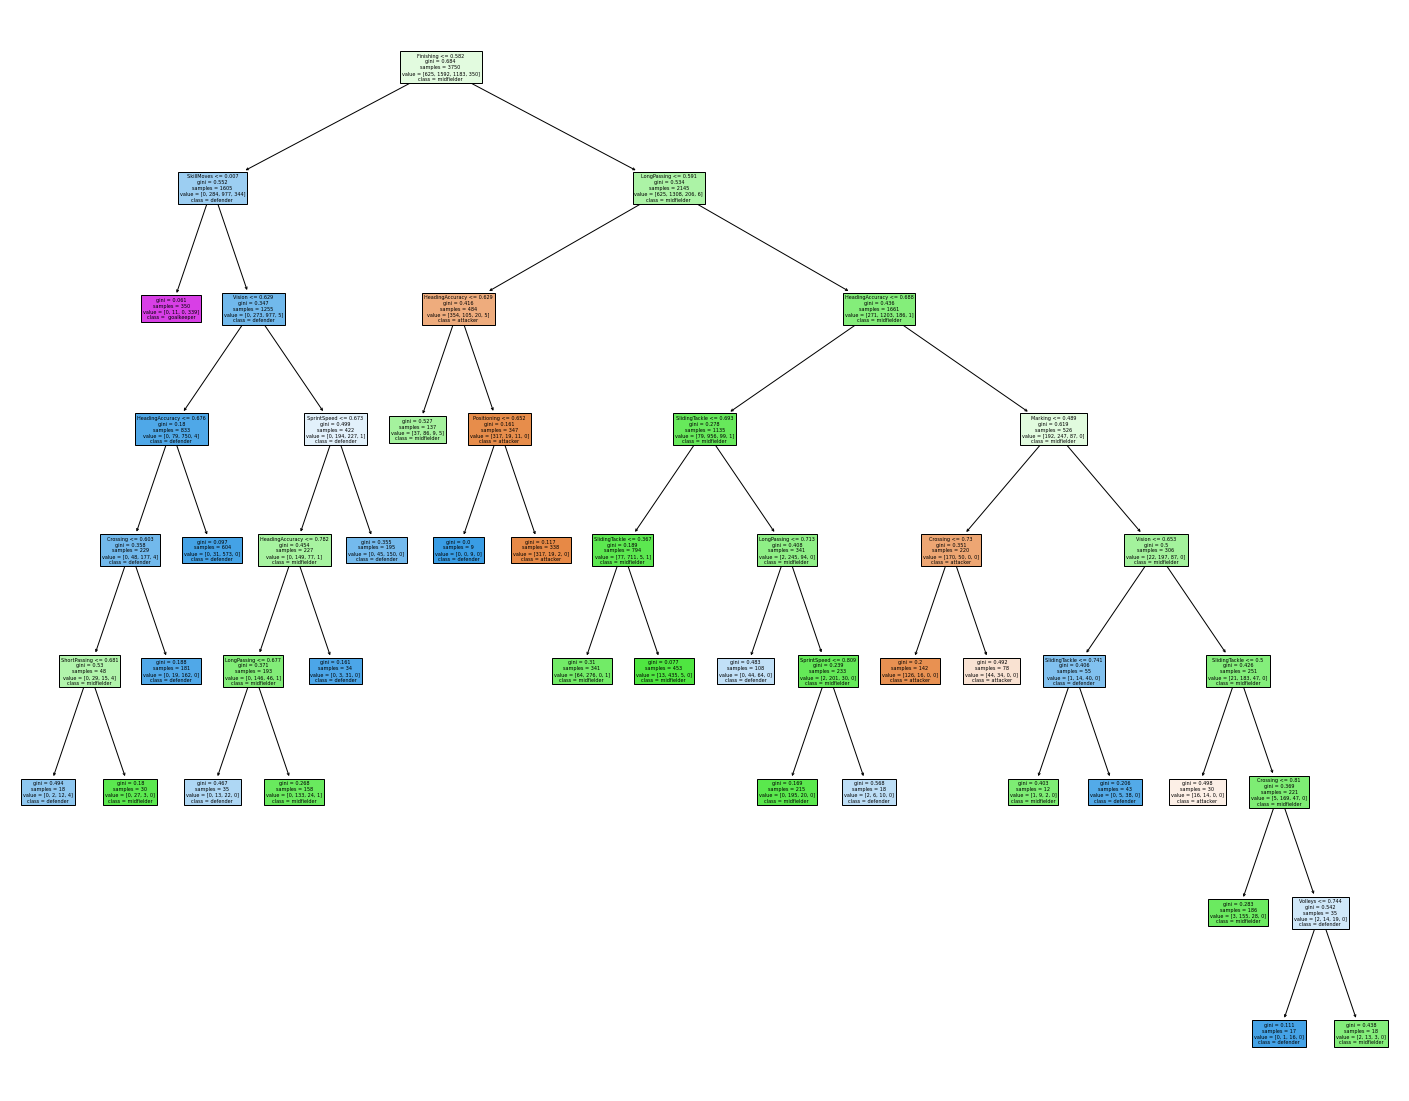

In [163]:
from sklearn import tree
from matplotlib import pyplot as plt

fig_tree = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dtree, 
                   feature_names=X_train.columns,  
                   class_names= ['attacker', 'midfielder', 'defender', ' goalkeeper'],
                   filled=True)

## IV. Best model is SVC with Rbf kernel

We have chosen the model SVC with Rbf kernel as the best model because it has the highest Cross-validated score as shown below.



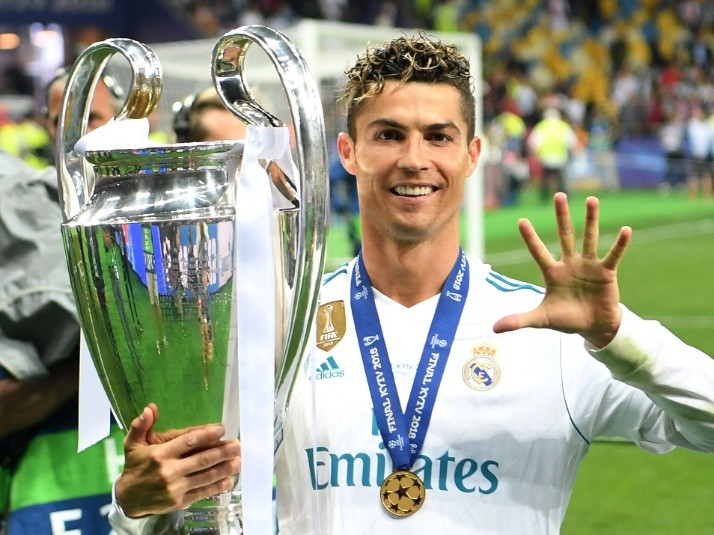

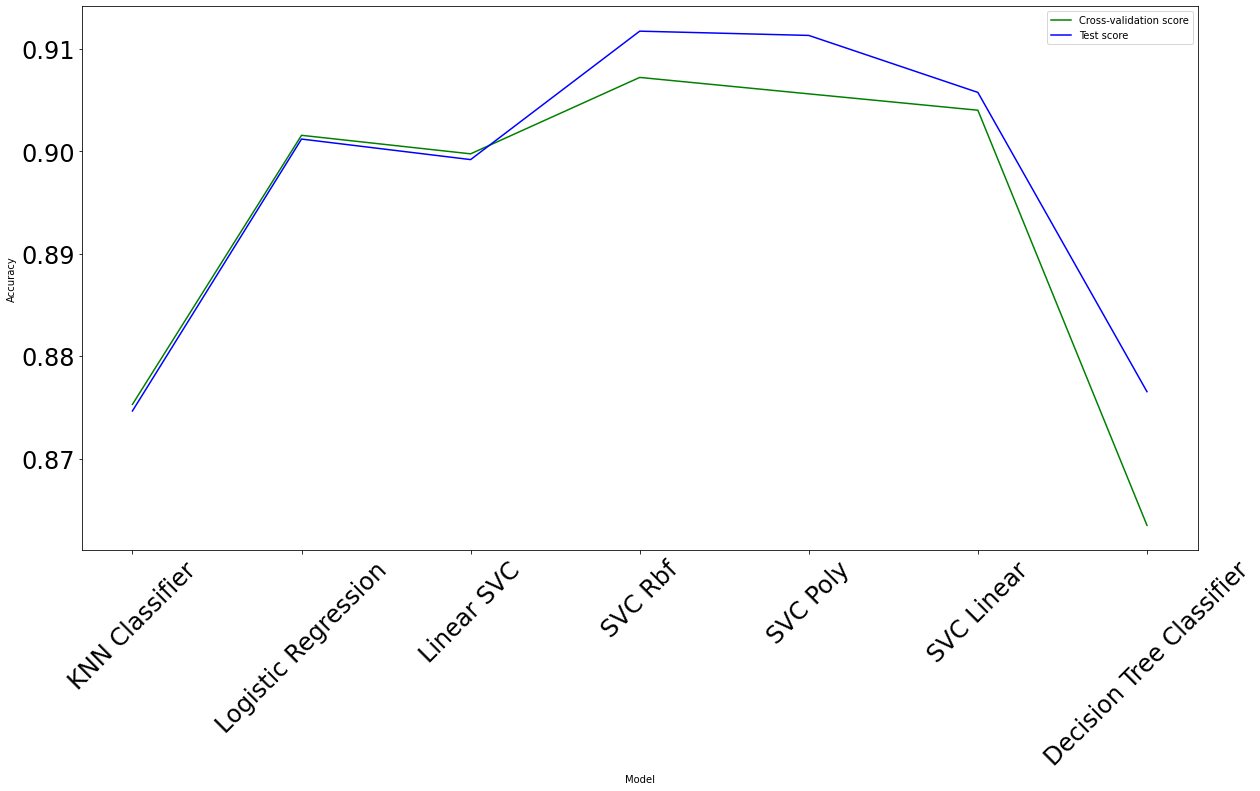

In [156]:
data = {'Model':['KNN Classifier', 'Logistic Regression', 'Linear SVC', 'SVC Rbf', 
                 'SVC Poly', 'SVC Linear', 'Decision Tree Classifier'],
        'Best Cross Validation Score':[cvknn, cvlogreg, cvlsvc, cvsvcrbf, cvsvcpoly, cvsvcl, cvdtc],
        'Test Score':[testknn, testlogreg, testlsvc, testsvcrbf, testsvcpoly, testsvcl, testdtc]}

df3 = pd.DataFrame(data)

plt.subplots(figsize = (20,10))
plt.plot(df3['Model'], df3['Best Cross Validation Score'], c='g', label = 'Cross-validation score')
plt.plot(df3['Model'], df3['Test Score'], c='b', label = 'Test score')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.xticks(rotation = 45)
plt.legend();

In [157]:
print("Best parameters for SVC with rbf kernel: {}".format(svcrbf_grid.best_params_))
print("Best cross-validation score for SVC with rbf kernel: {:.4f}".format(cvsvcrbf))
print("Test score for SVC with rbf kernel: {:.4f}".format(testsvcrbf))

Best parameters for SVC with rbf kernel: {'C': 100, 'gamma': 0.01}
Best cross-validation score for SVC with rbf kernel: 0.9072
Test score for SVC with rbf kernel: 0.9117


In [158]:
best_model = SVC(kernel = 'rbf', C = 10, gamma = 0.1)
best_model.fit(X_train, y_train)

SVC(C=10, gamma=0.1)

In [1]:
# Classification report for best model -SVC (rbf) Classifier

from sklearn.metrics import classification_report

y_pred = best_model.predict(X_test)

print(classification_report(y_test, y_pred, target_names= ['attacker', 'midfielder', 'defender', ' goalkeeper']))

NameError: name 'best_model' is not defined

D:\ANACONDA\envs\Jupyter\lib\site-packages\mlxtend\plotting\decision_regions.py:274: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x=x_data,


Text(0.5, 1.0, 'SVM Decision Region Boundary')

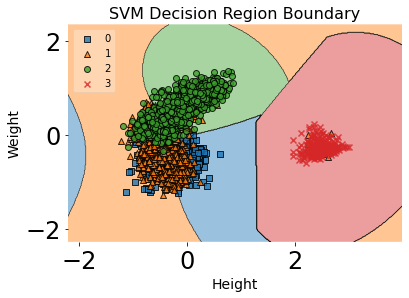

In [180]:
# Visualize our best model using PCA to reduce to 2 axis only

from sklearn.decomposition import PCA
from mlxtend.plotting import plot_decision_regions

pca = PCA(n_components = 2)
X_train2 = pca.fit_transform(X_train)
best_model.fit(X_train2, y_train)
plot_decision_regions(X_train2, np.array(y_train), clf=best_model, legend=2)

plt.xlabel(X.columns[0], size=14)
plt.ylabel(X.columns[1], size=14)
plt.title('SVM Decision Region Boundary', size=16)